In [644]:
import numpy as np
from PIL import Image
import os
from IPython.display import clear_output
from matplotlib import pyplot as plt
from PIL import Image


w = np.random.uniform(0,1,(256, 4))
w0 = np.random.uniform(-3,-3, (4,))

# Обучающий набор

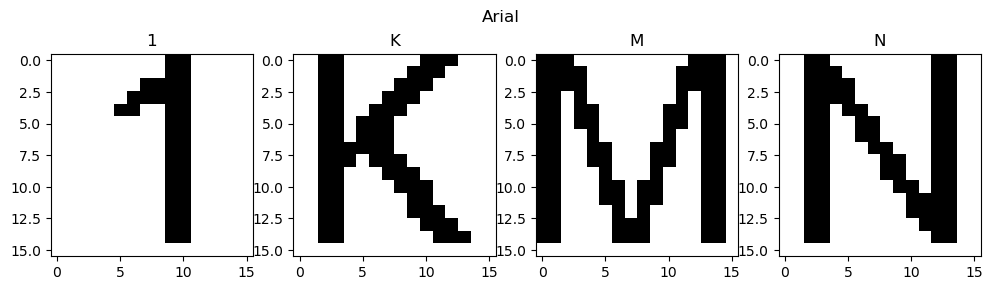

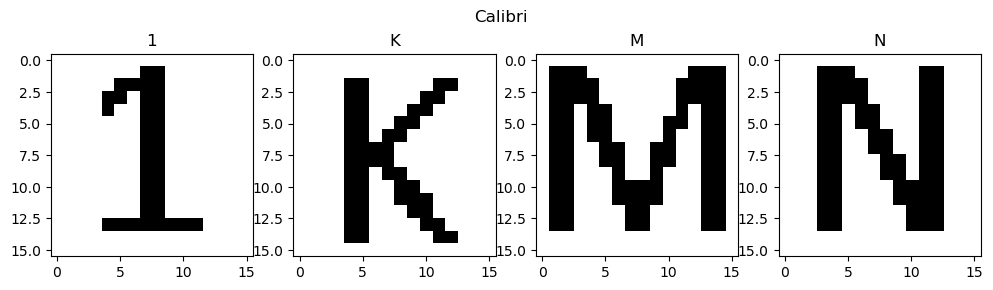

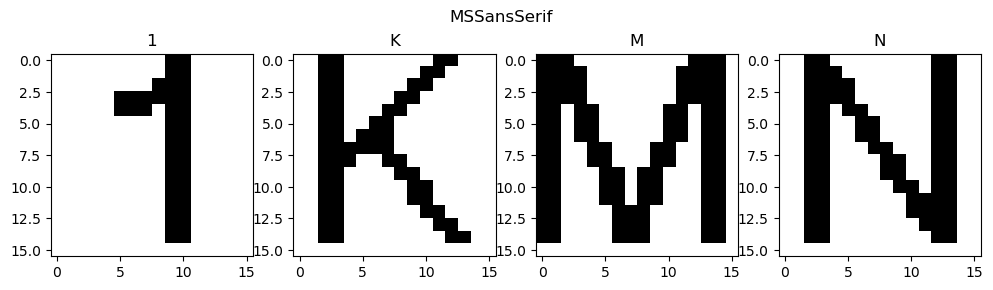

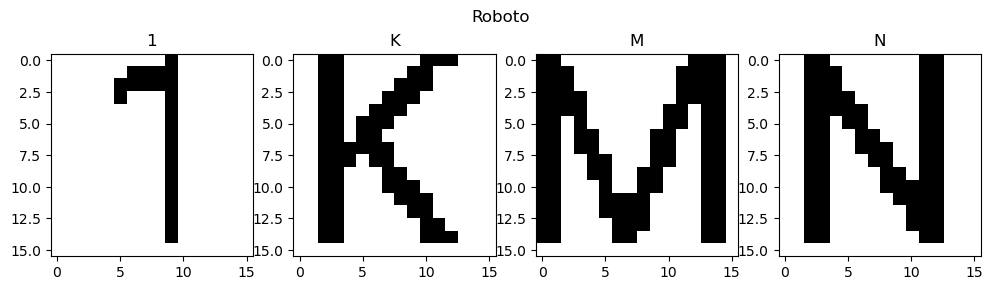

In [645]:
def disp(imag, fn):
    plt.figure(figsize=(12, 3))
    for i in range (len(imag)):
        plt.subplot(140 + i + 1)
        plt.imshow(imag[i])
        plt.title(fn[i][(len(fn[0])-5):(len(fn[0])-4)])
    plt.suptitle(fn[i][:len(fn[i])-6])
    plt.show()

cnt = 0
imag = []
fns = []
for filename in os.listdir("./Images/Learn"):
    if cnt % 4 == 0 and cnt != 0:
        disp(imag,fns)
        imag = []
        fns = []
    imag.append(Image.open('./Images/Learn/' + filename))
    fns.append(filename)
    cnt += 1
disp(imag,fns)


# Первый тестовый набор

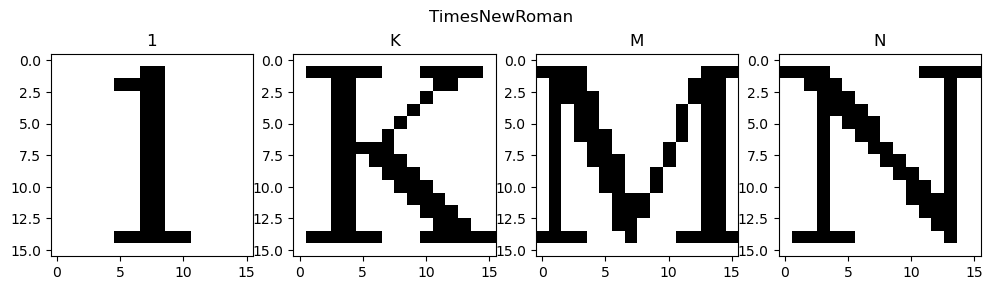

In [642]:
cnt = 0
imag = []
fns = []
for filename in os.listdir("./Images/Test"):
    if cnt % 4 == 0 and cnt != 0:
        disp(imag,fns)
        imag = []
        fns = []
    imag.append(Image.open('./Images/Test/' + filename))
    fns.append(filename)
    cnt += 1
disp(imag,fns)

# Второй тестовый набор

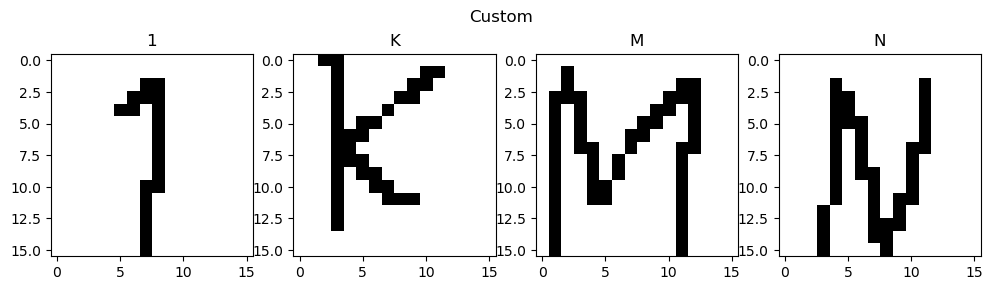

In [643]:
cnt = 0
imag = []
fns = []
for filename in os.listdir("./Images/Test2"):
    if cnt % 4 == 0 and cnt != 0:
        disp(imag,fns)
        imag = []
        fns = []
    imag.append(Image.open('./Images/Test2/' + filename))
    fns.append(filename)
    cnt += 1
disp(imag,fns)

In [399]:
def img_show(l):
    plt.figure(figsize=(12, 3))
    img = []
    for i in range(4):
        a = w[:,i]
        b = []
        for i in range(len(a)):
            if a[i] < 0:
                b.append( [a[i]*100,0,0])
            else:
                b.append( [0,a[i]*100,0])
        b = np.array(b, dtype=np.uint8).reshape(16,16,3)
        img.append(Image.fromarray(b, 'RGB'))
        #img.show()
        #plt.imshow(img, interpolation='nearest')
     
    plt.subplot(141)
    plt.imshow(img[0], interpolation='nearest')
    plt.title('K')
    plt.subplot(142)
    plt.imshow(img[1], interpolation='nearest')
    plt.title('M')
    plt.subplot(143)
    plt.imshow(img[2], interpolation='nearest')
    plt.title('N')
    plt.subplot(144)
    plt.imshow(img[3], interpolation='nearest')
    plt.title('1')
    plt.suptitle(l)
    plt.show()

# Обучение

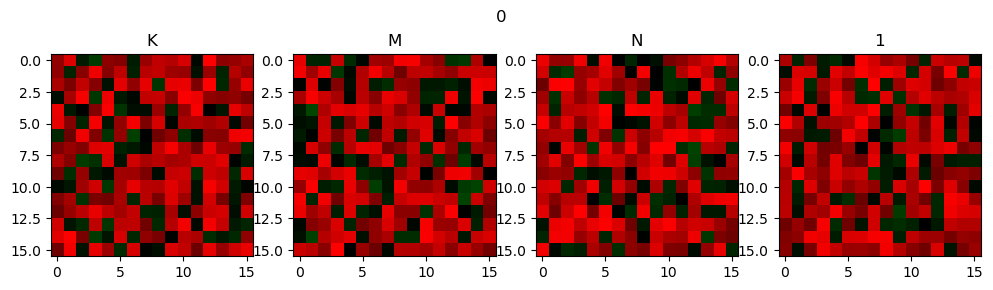

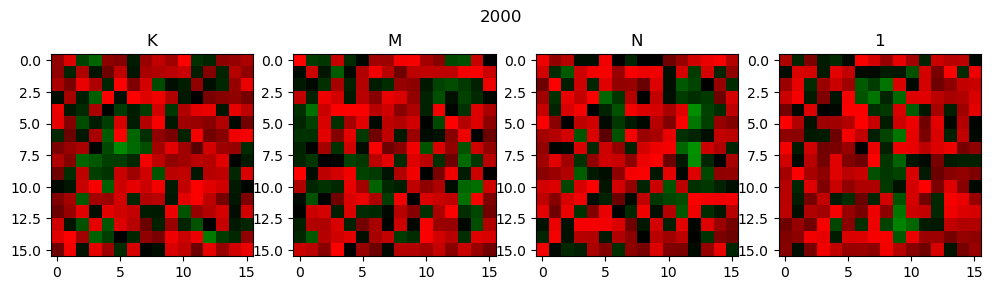

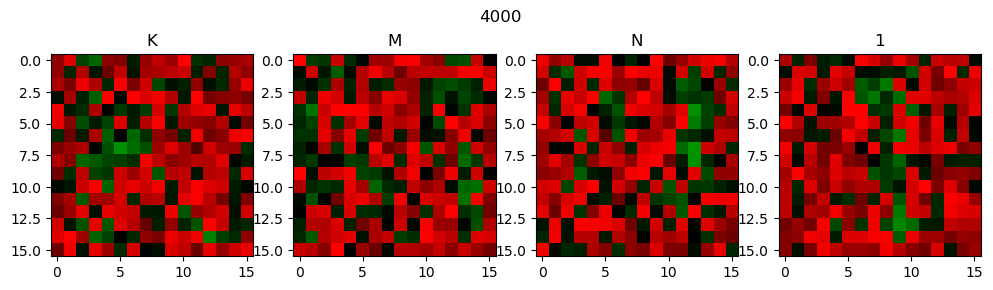

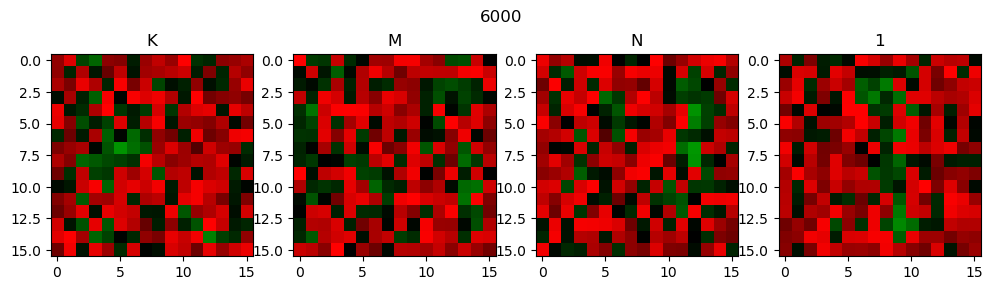

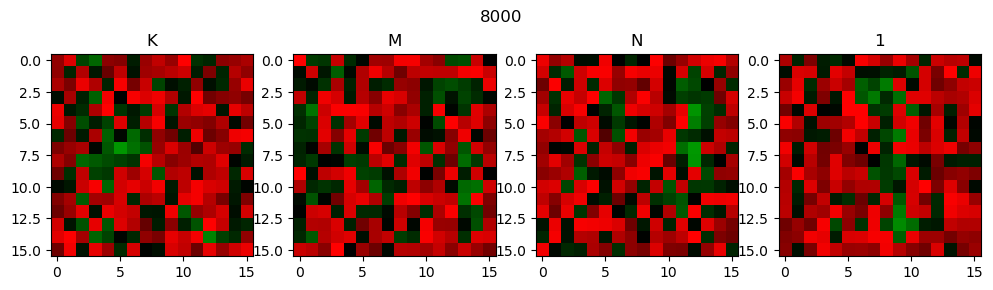

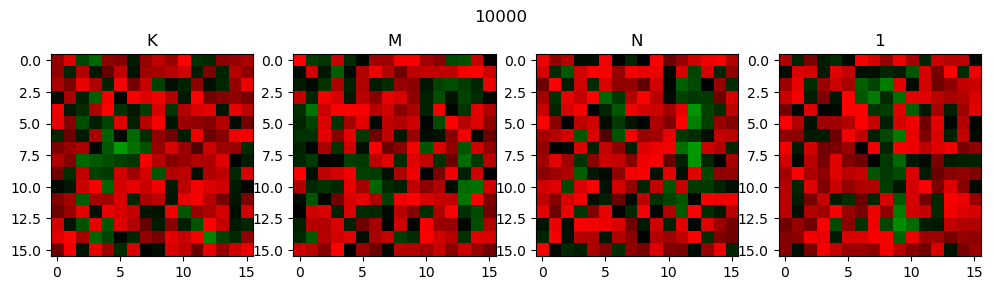

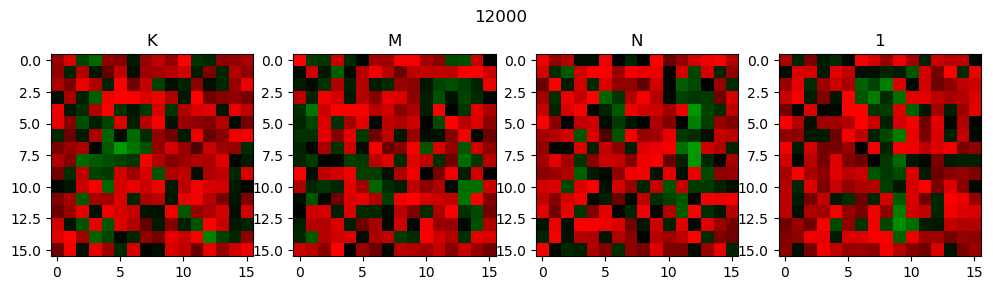

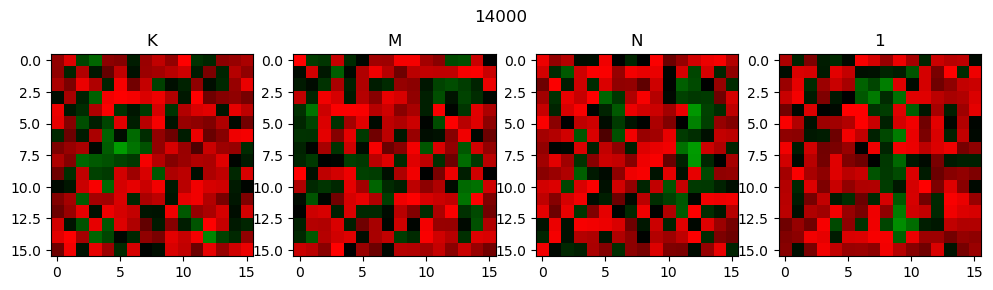

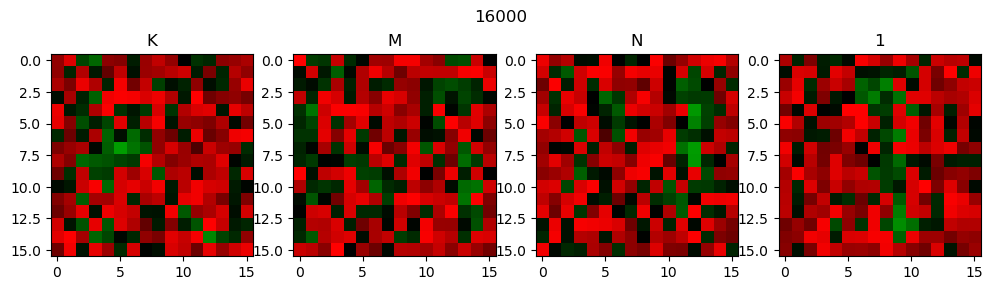

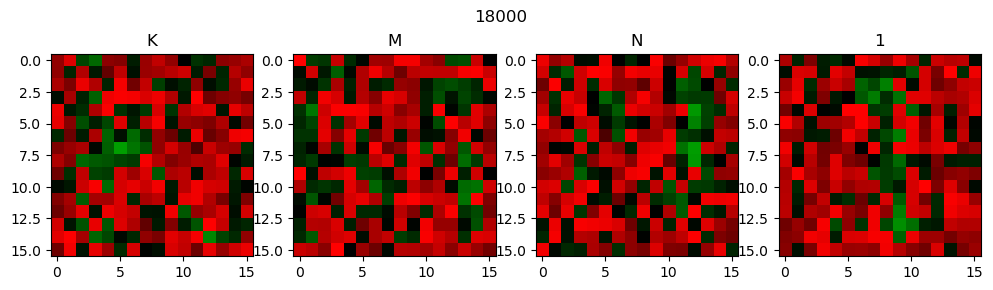

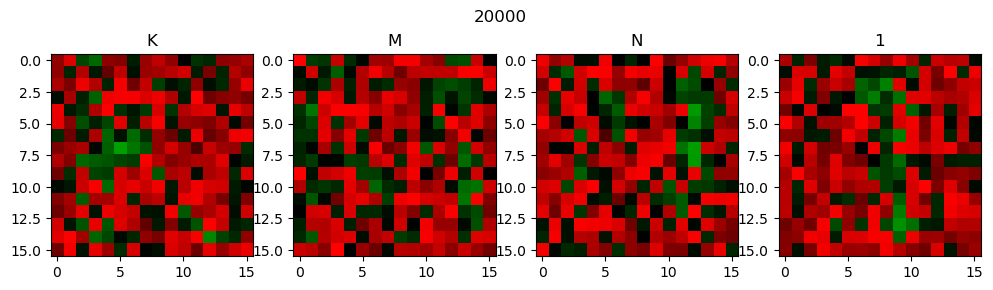

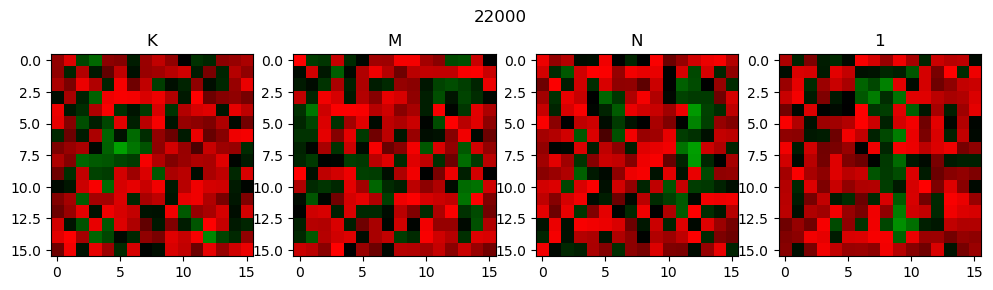

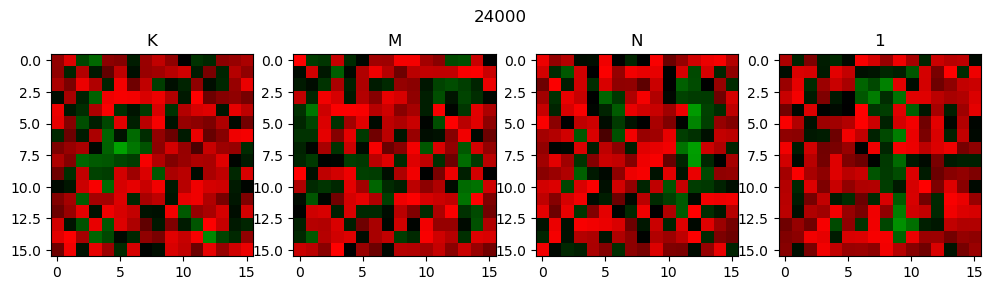

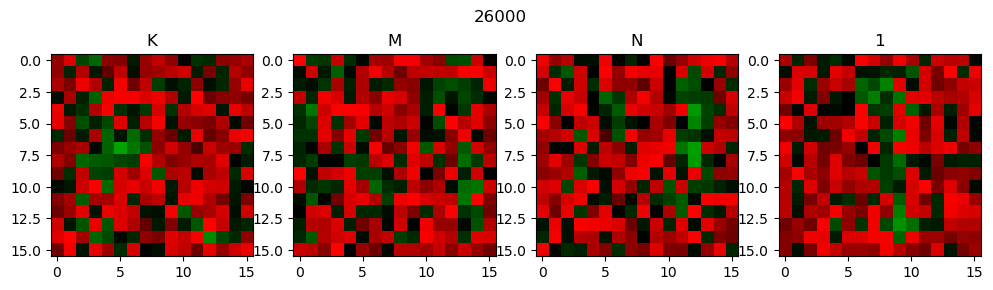

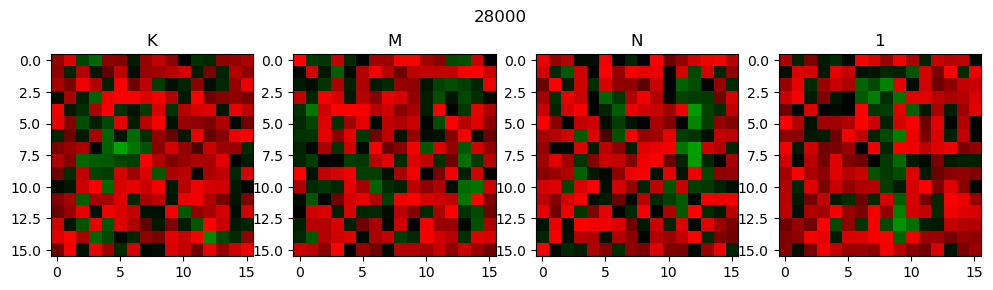

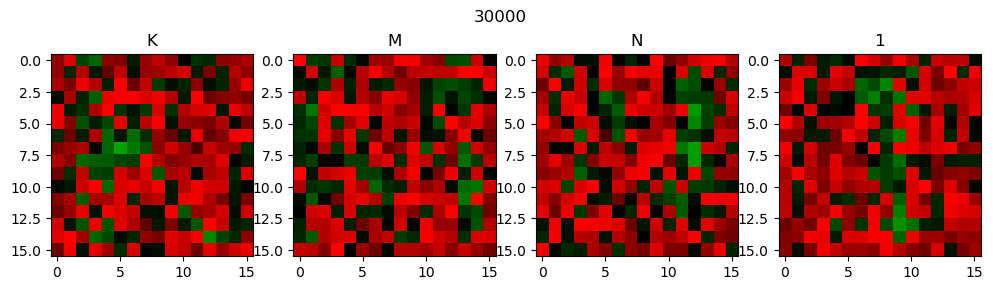

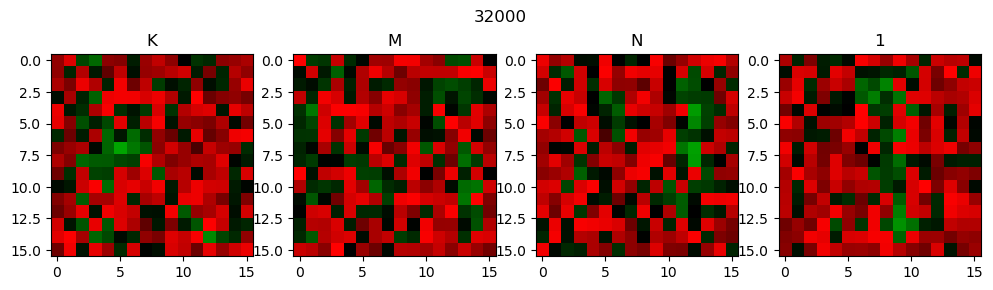

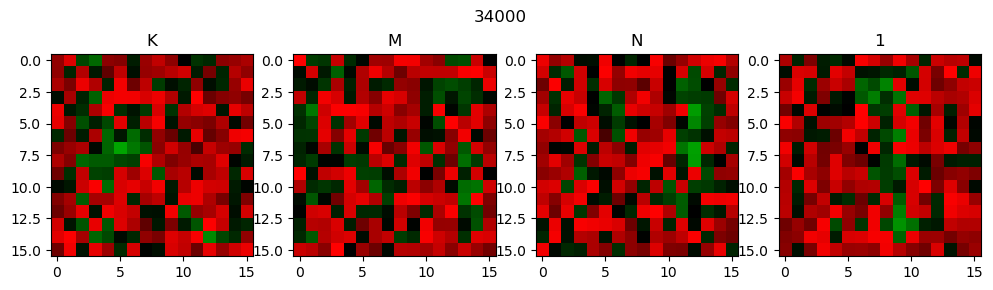

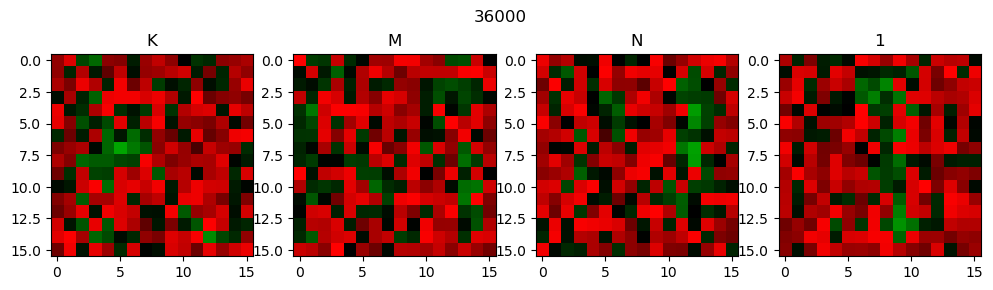

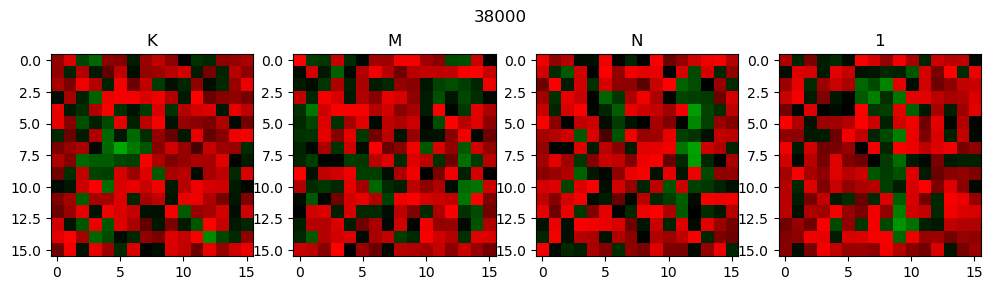

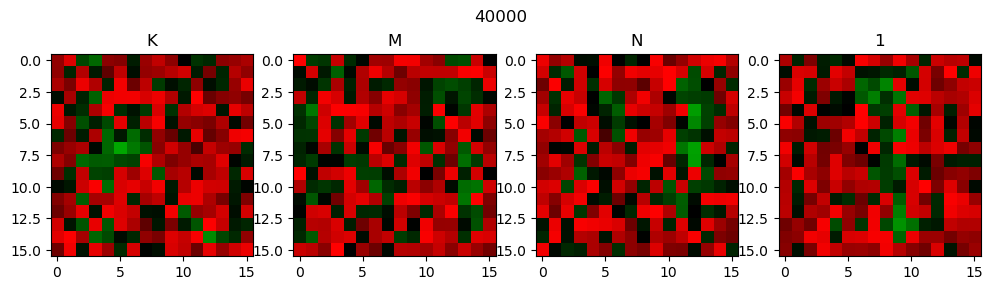

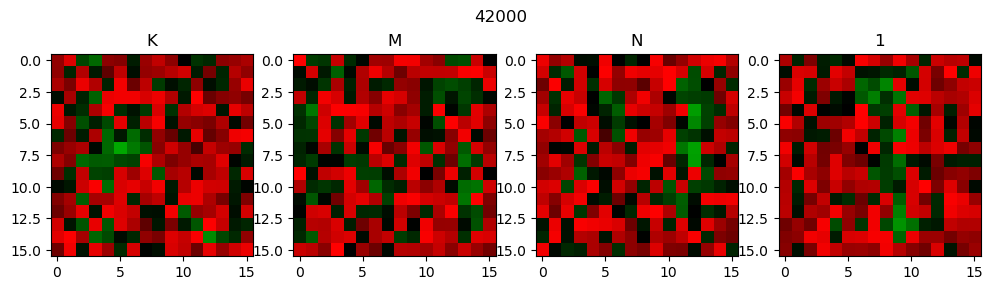

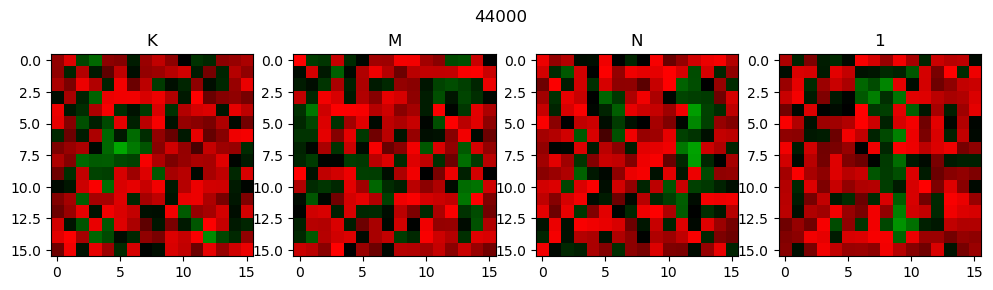

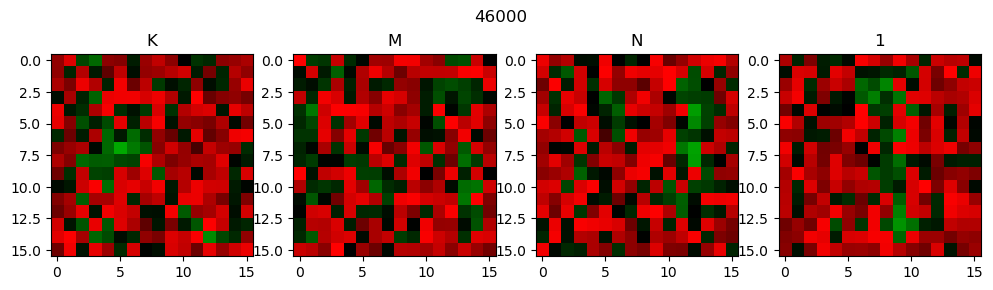

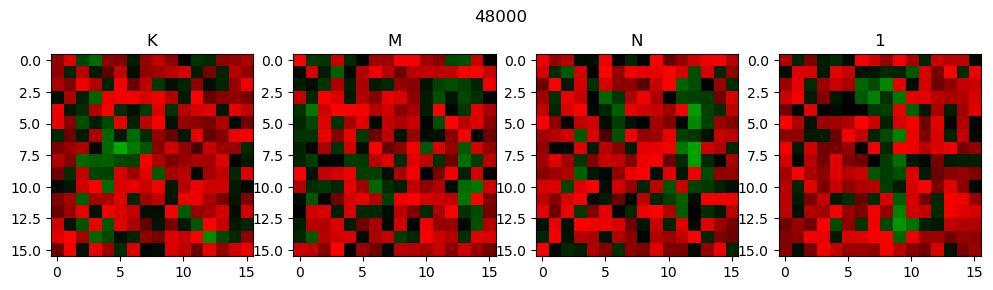

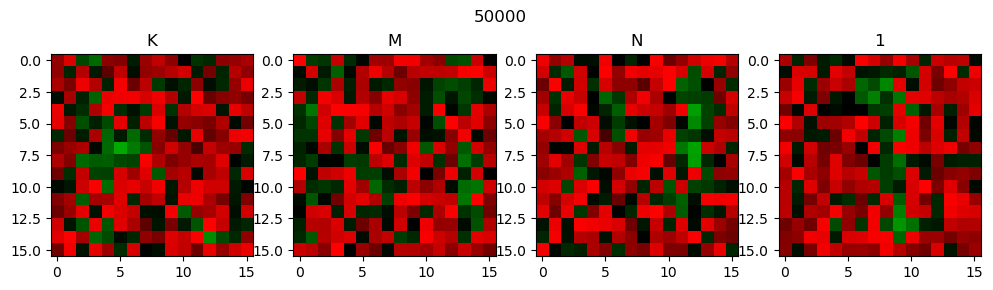

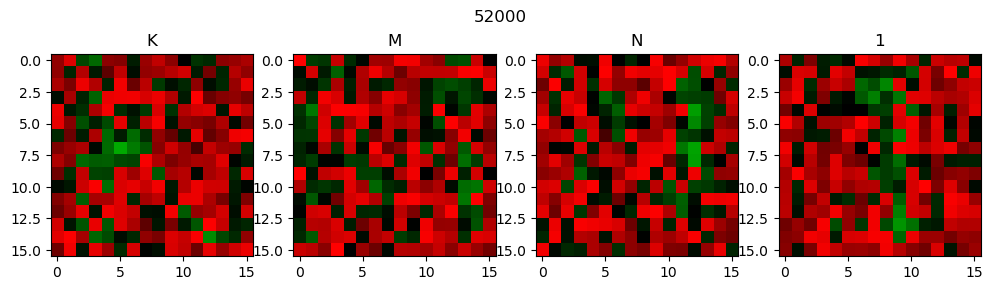

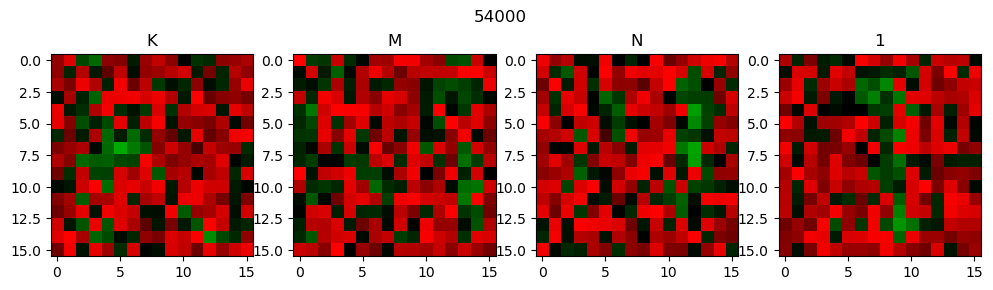

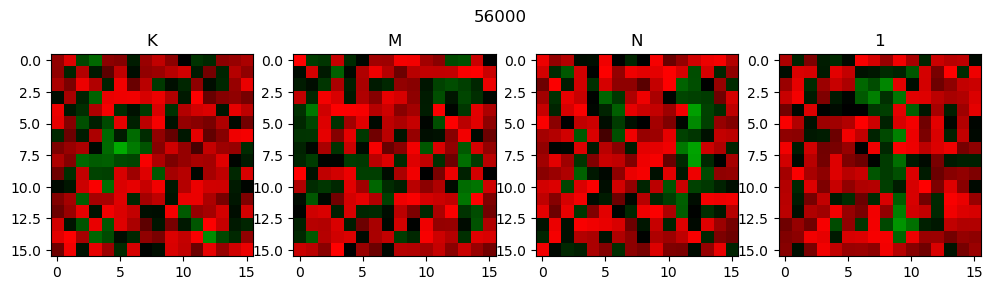

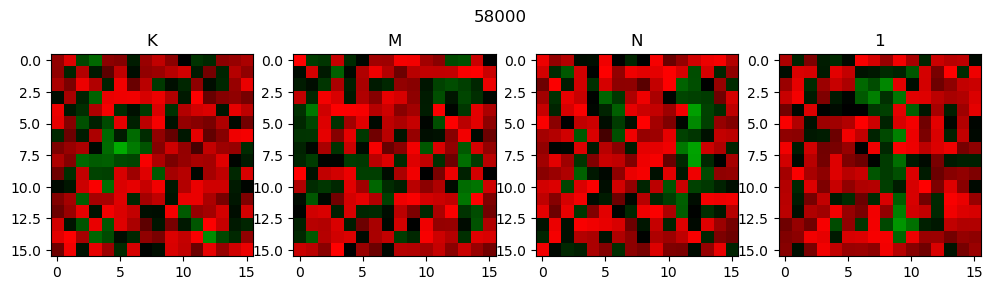

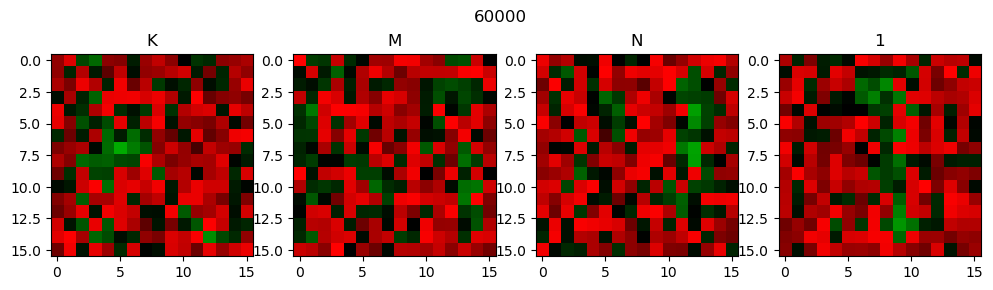

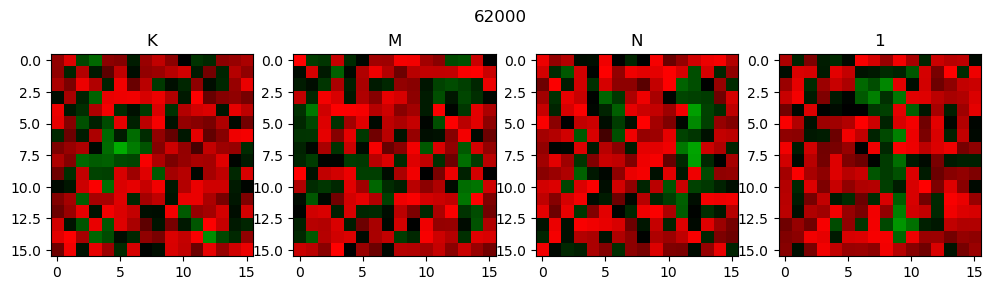

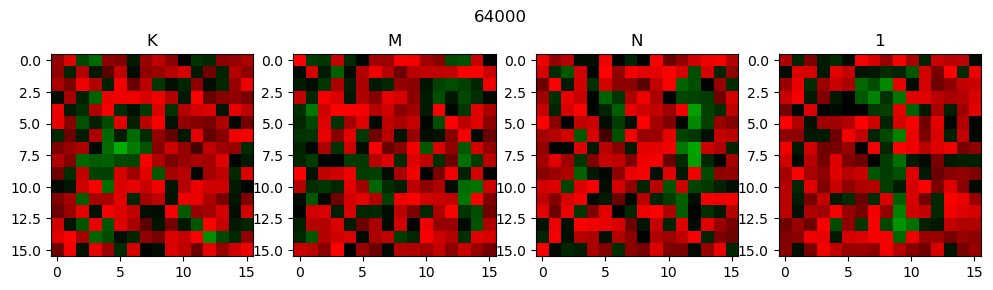

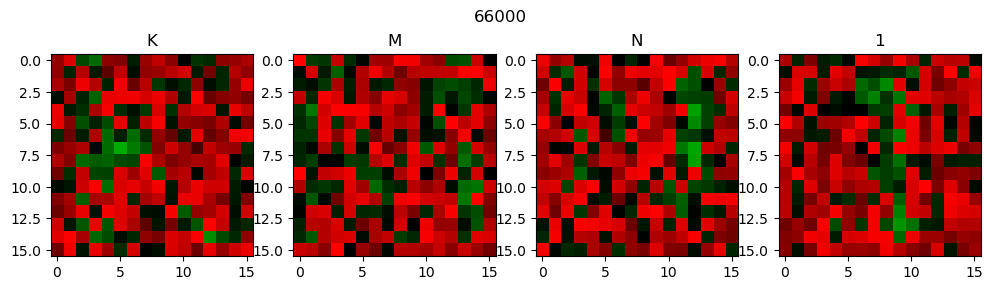

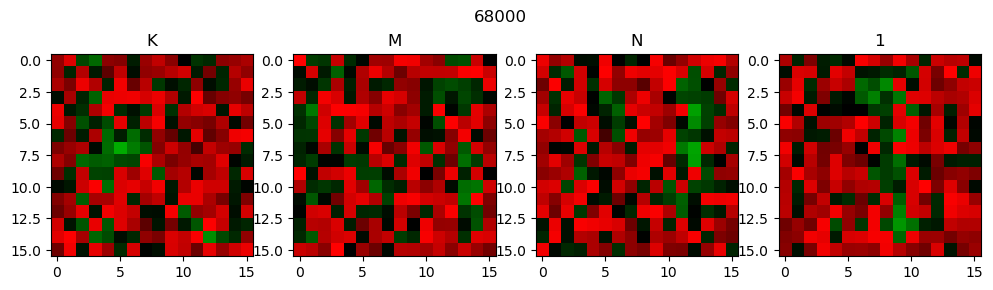

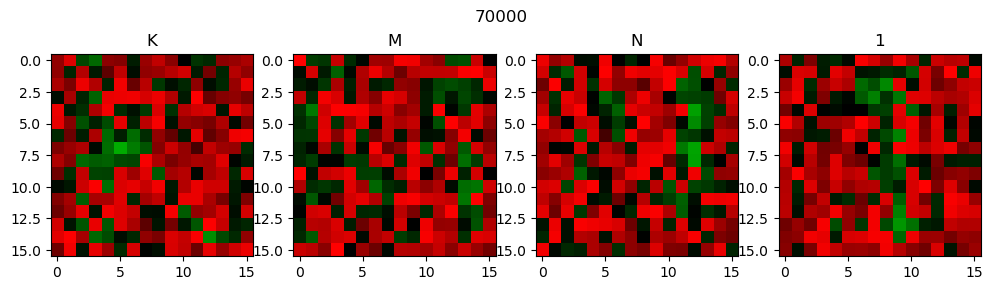

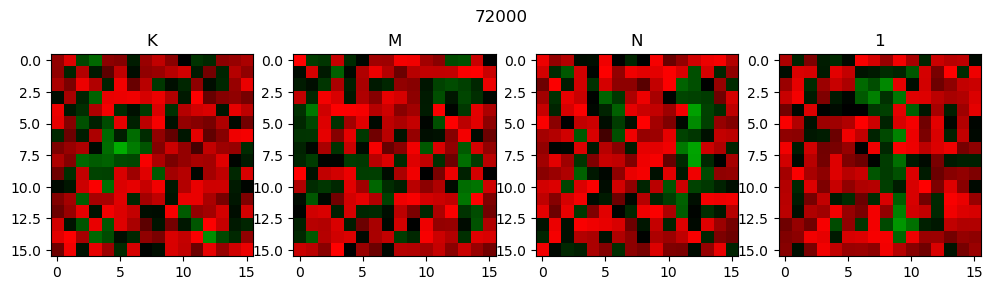

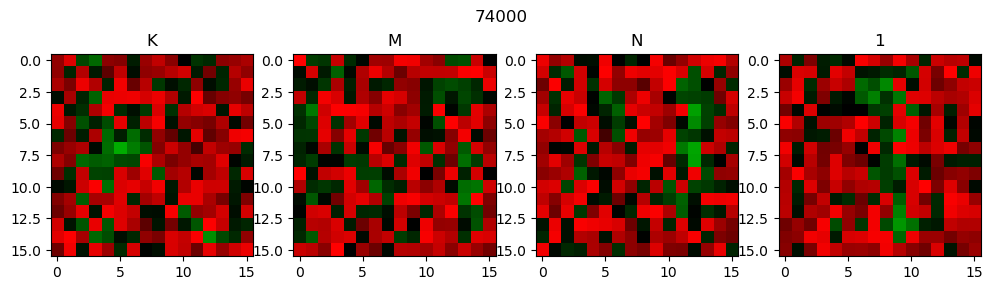

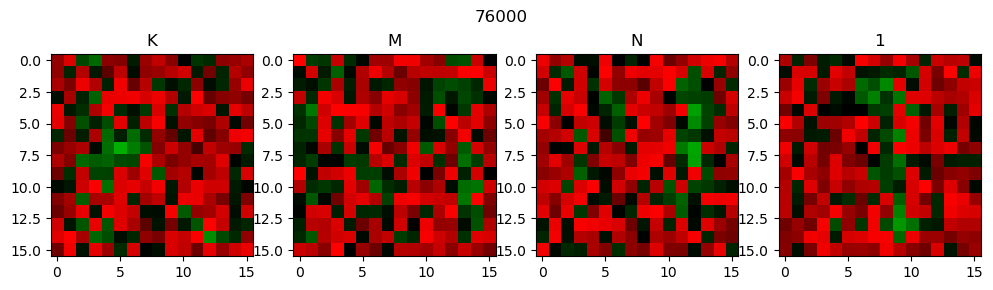

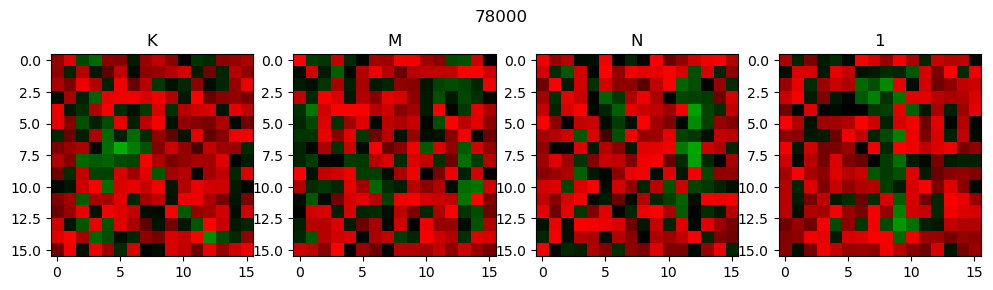

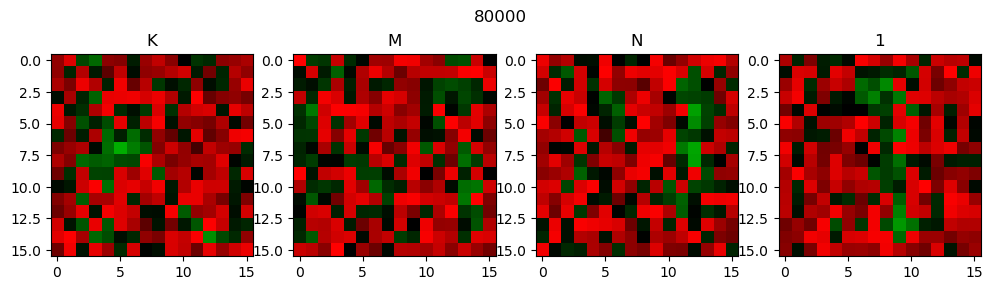

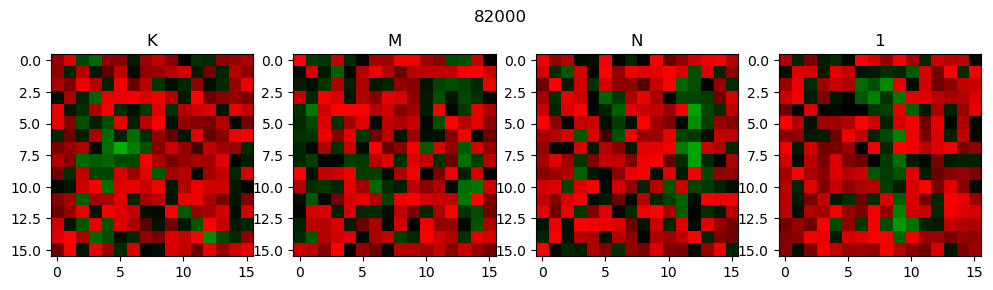

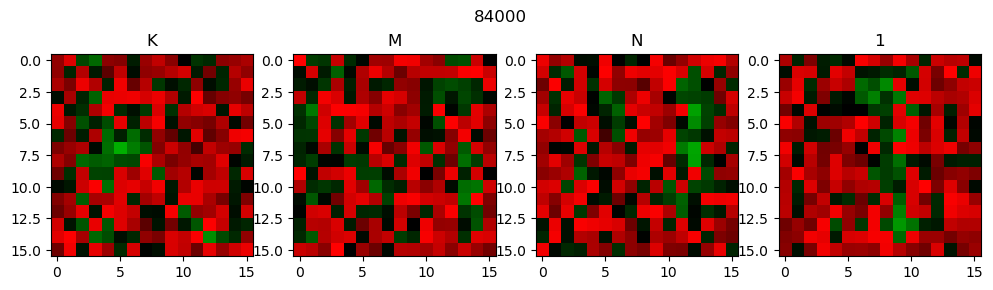

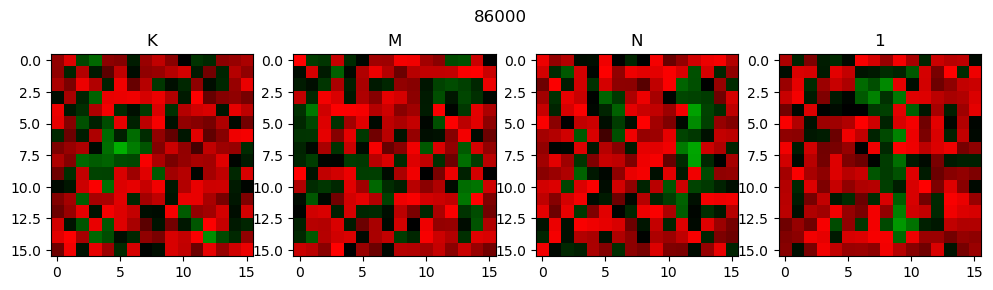

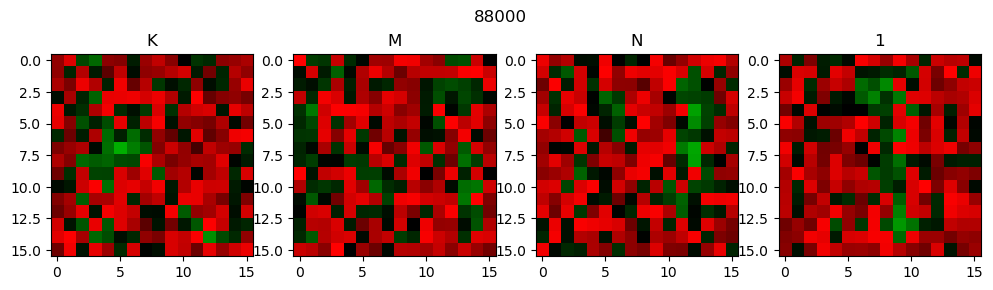

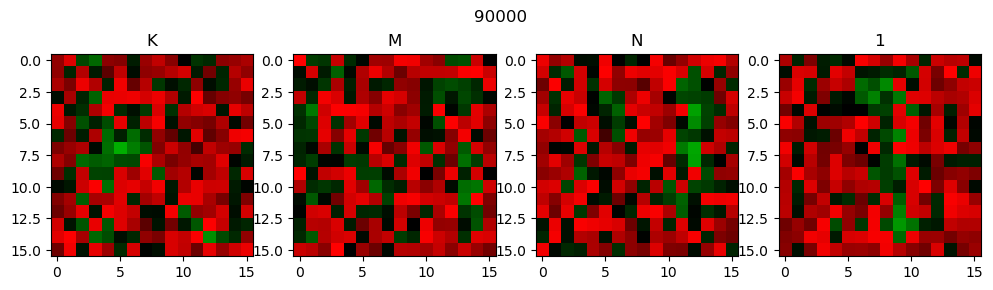

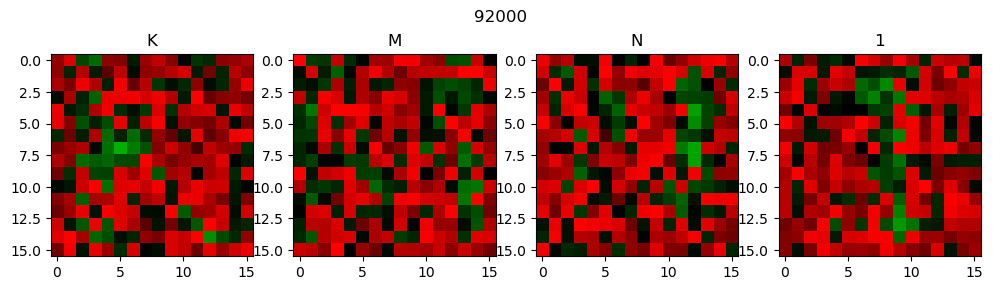

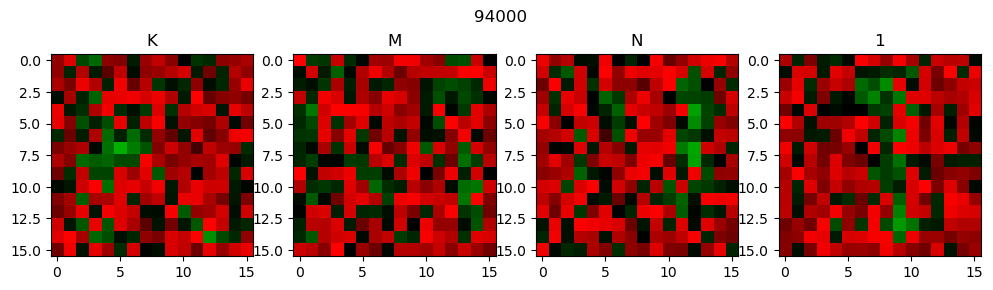

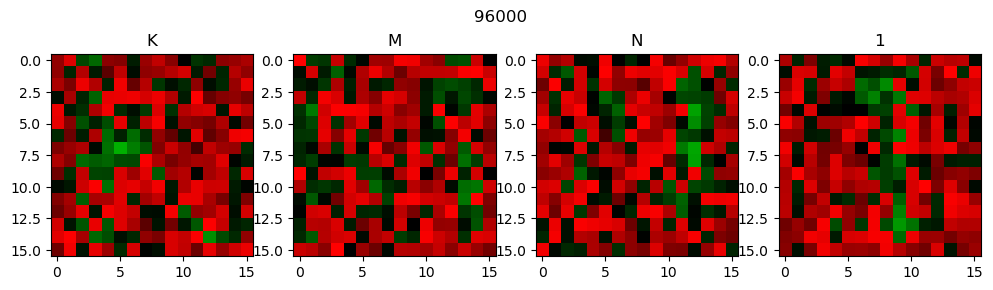

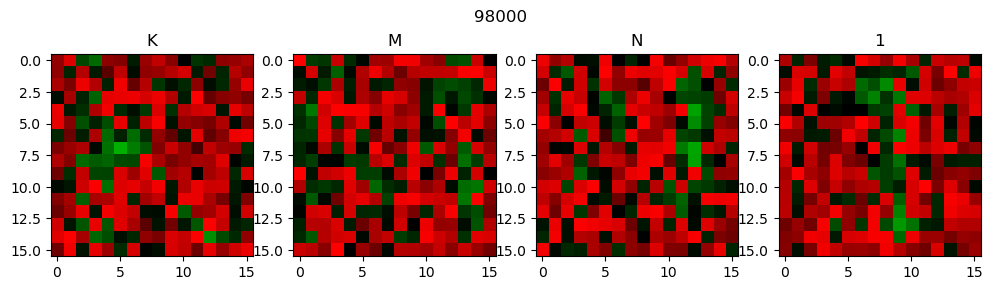

In [378]:
learnbase = np.empty((0,256))
ansbase = np.empty((0,4))
#w = np.random.uniform(-1.5,0.5,(256, 4))
#w0 = np.random.uniform(-1.5,0.5, (4,))
eta = 0.05
counter = 100000

for filename in os.listdir("./Images/Learn"):
    arr = np.array(Image.open('./Images/Learn/' + filename))
    arr = arr.reshape(np.size(arr))
    for i in range(len(arr)):
        arr[i] = not arr[i]
            
    ansbase = np.vstack((ansbase,[1 if filename[len(filename)-5:len(filename)-4] == 'K' else 0,
                   1 if filename[len(filename)-5:len(filename)-4] == 'M' else 0,
                   1 if filename[len(filename)-5:len(filename)-4] == 'N' else 0,
                   1 if filename[len(filename)-5:len(filename)-4] == '1' else 0]))
    learnbase = np.concatenate((learnbase,[arr]))
    

def neursum(inputs, wghts,c):
    return (inputs*wghts).sum()+c

def f(net):
    return 1/(1+np.exp(-net))

img_show(0)
for iteration in range(counter):
    for i in range(len(learnbase)):
        for j in range(len(ansbase[0])):
            calculated = f(neursum(learnbase[i],w[:,j],w0[j]))
            err = ansbase[i][j] - calculated
            if err != 0:
                for k in range(256):
                    w[k][j]+= eta*err*learnbase[i][k]
                w0[j] += eta*err
    #clear_output()
    if ((iteration+1)%2000 == 0):
        img_show(iteration+1)
    #print((iteration+1)/counter*100,end = '%')

In [379]:
for filename in os.listdir("./Images/Test"):
    img = Image.open('./Images/Test/' + filename)
    arr = np.array(img)
    arr = arr.reshape(np.size(arr))
    ans = []
    for i in range(len(arr)):
        arr[i] = not arr[i]
    for j in range(4):
        ans.append(f(neursum(arr,w[:,j],w0[j])))
    display(img)
    for i in range(len(ans)):
        print(ans[i]*100,'%',' - ',"KMN1"[i],sep="")    

0.00015710729169701902% - K
0.0016356112761719214% - M
8.433010592187984e-06% - N
99.97979391484164% - 1


98.89046294479455% - K
8.3318517157882e-07% - M
0.004413539884450365% - N
1.568045856306468e-10% - 1


2.0974404716362595e-10% - K
99.99890111757948% - M
2.8436927550045337e-10% - N
8.600371727115706e-18% - 1


1.4620529209754963e-06% - K
0.009493801862217743% - M
99.99062556101919% - N
3.086251810128532e-07% - 1


In [380]:
for filename in os.listdir("./Images/Test2"):
    img = Image.open('./Images/Test2/' + filename)
    arr = np.array(img)
    arr = arr.reshape(np.size(arr))
    ans = []
    for i in range(len(arr)):
        arr[i] = not arr[i]
    for j in range(4):
        ans.append(f(neursum(arr,w[:,j],w0[j])))
    display(img)
    for i in range(len(ans)):
        print(ans[i]*100,'%',' - ',"KMN1"[i],sep="")  

90.55249517630001% - K
11.539578480007748% - M
0.005026217200341598% - N
1.6125472000024523e-05% - 1


0.030822414468265048% - K
0.7015627389857286% - M
3.1946823456932423% - N
0.001968956879902164% - 1


3.850362447082846e-06% - K
0.09396471941039826% - M
10.258953130068518% - N
3.098599666140759e-07% - 1


0.0485611177026319% - K
0.5402167377723922% - M
0.017750076940463582% - N
99.90241124168772% - 1


# Обучение с повышенным коэффициентом

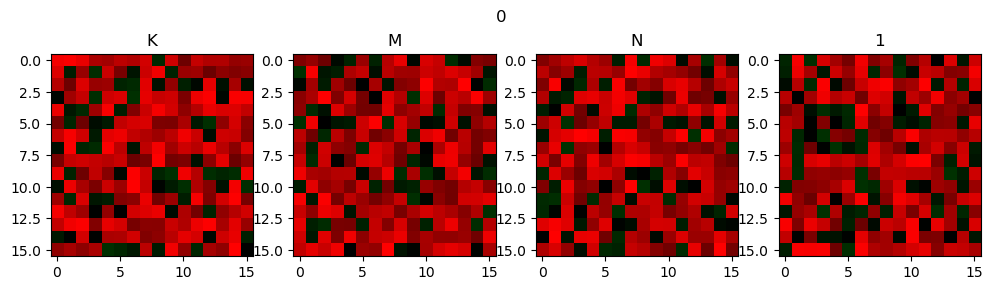

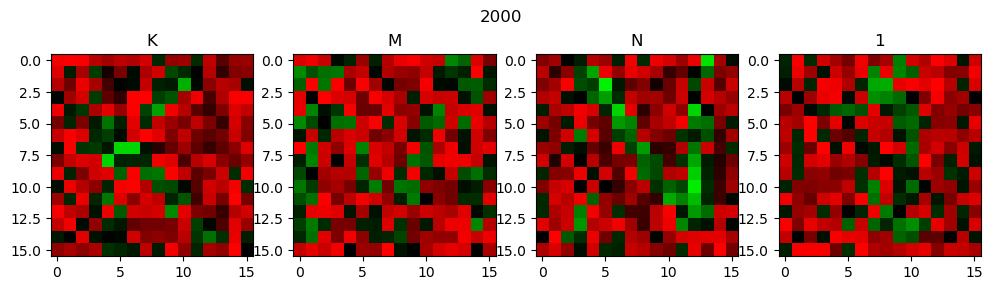

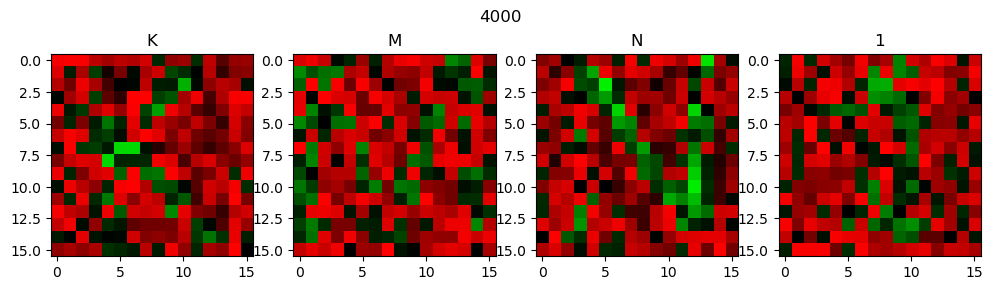

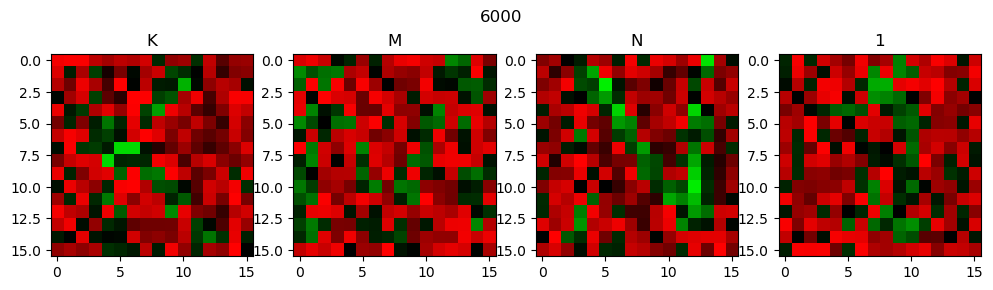

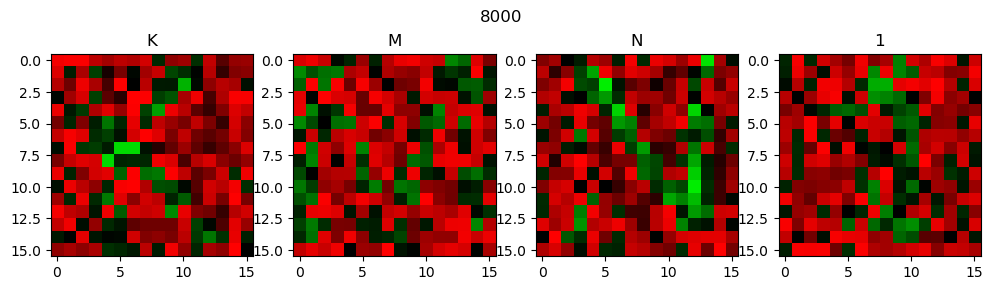

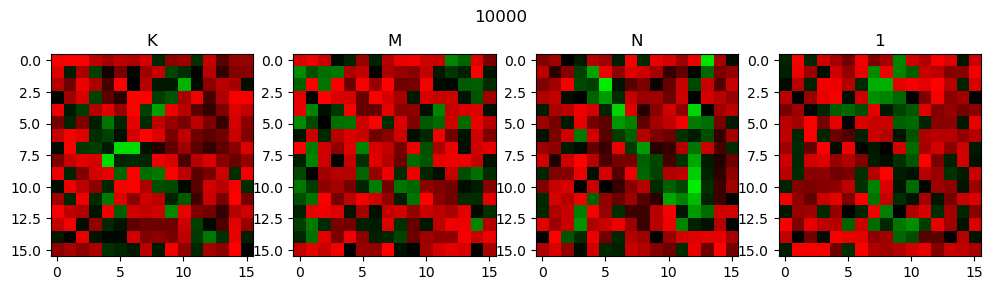

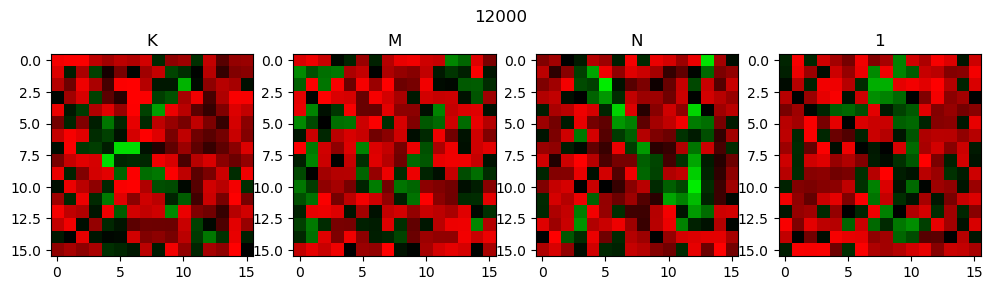

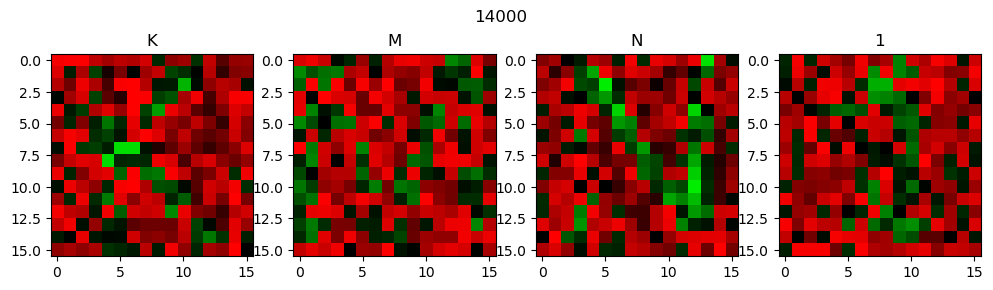

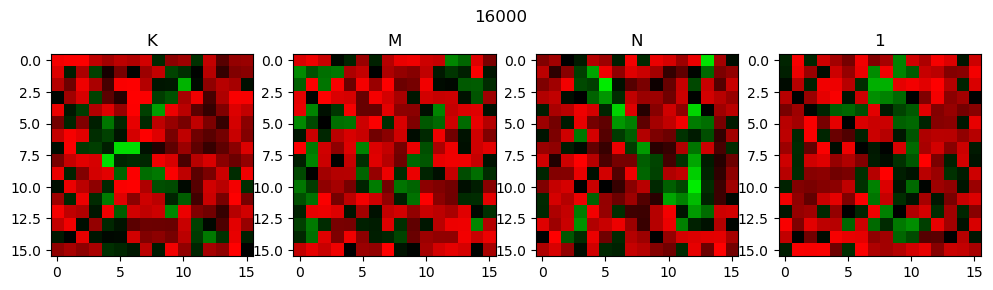

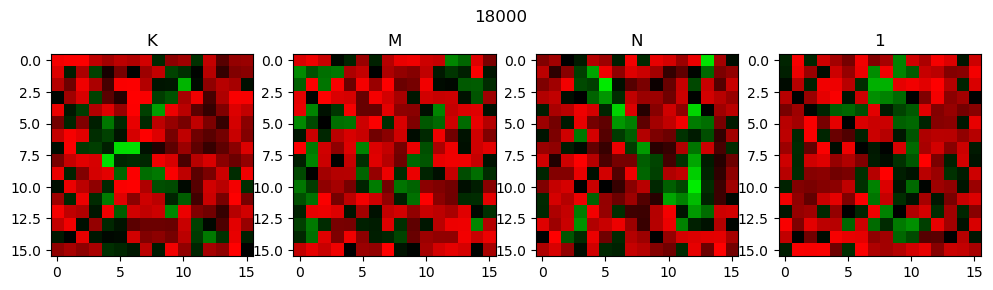

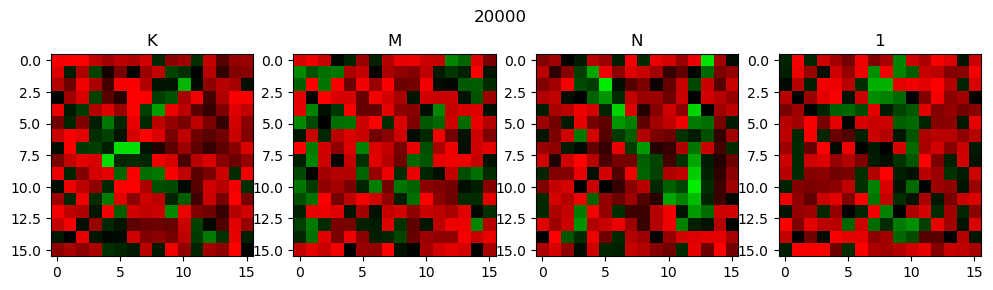

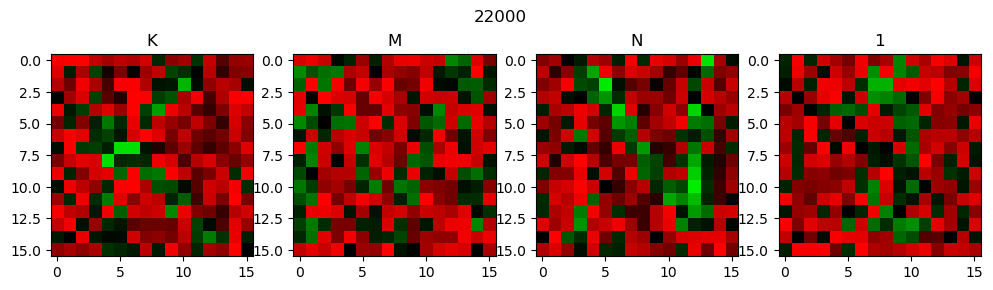

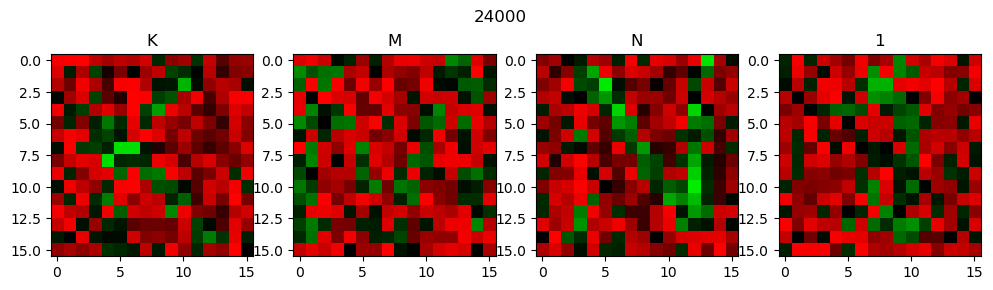

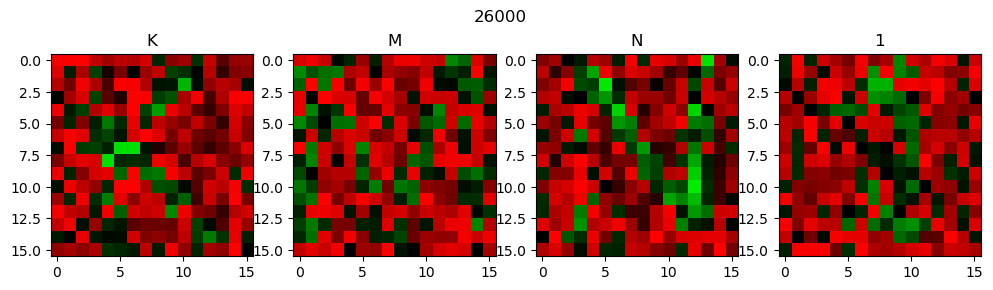

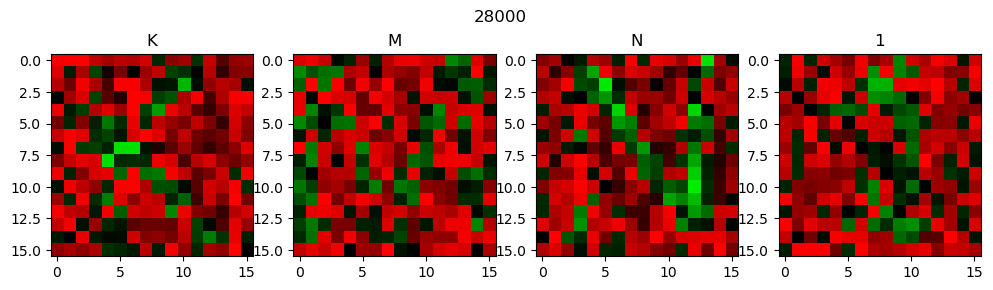

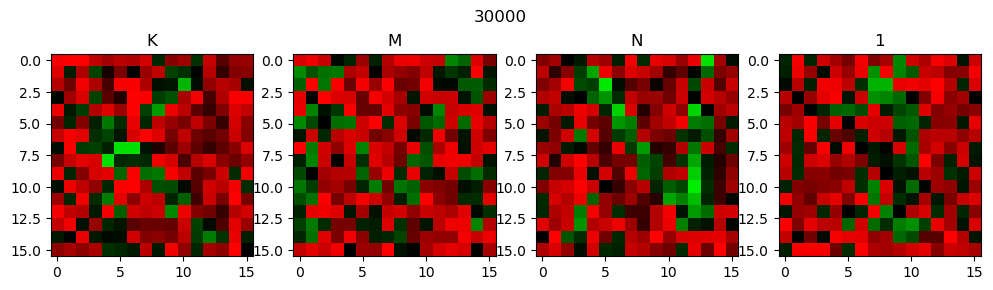

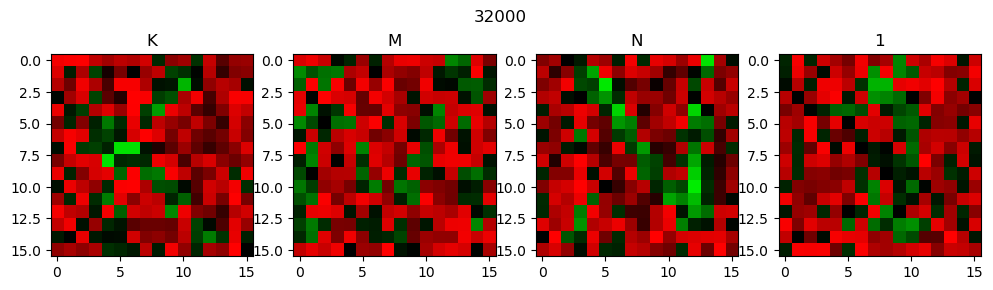

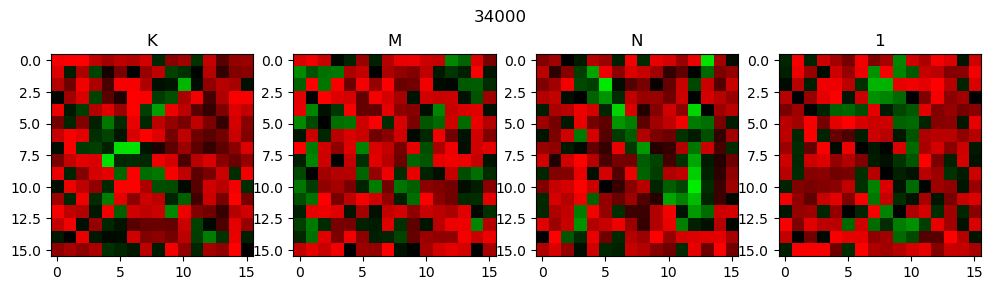

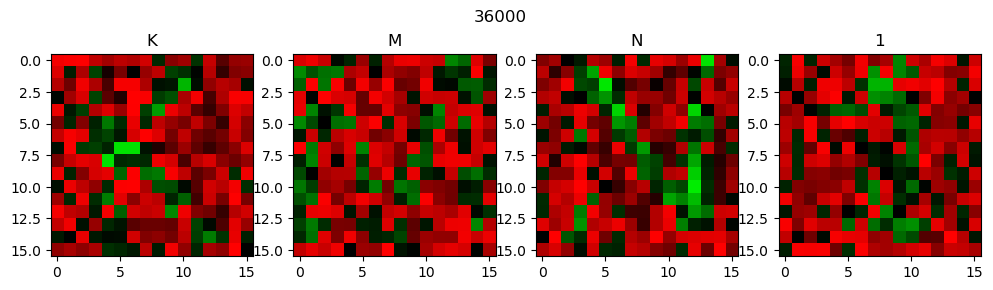

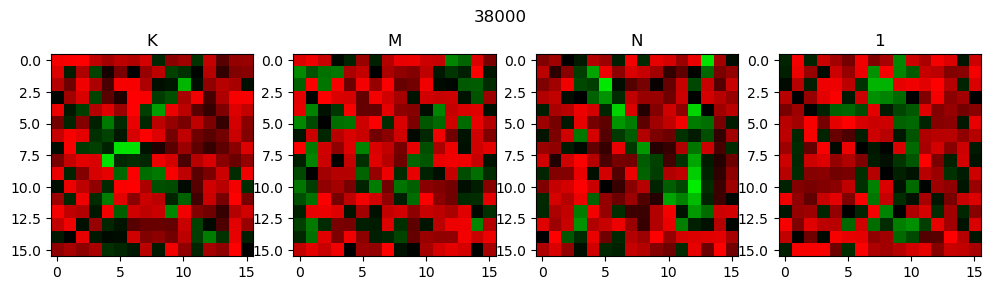

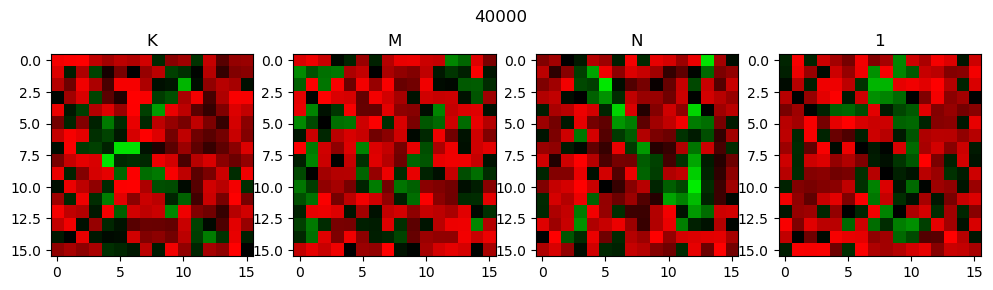

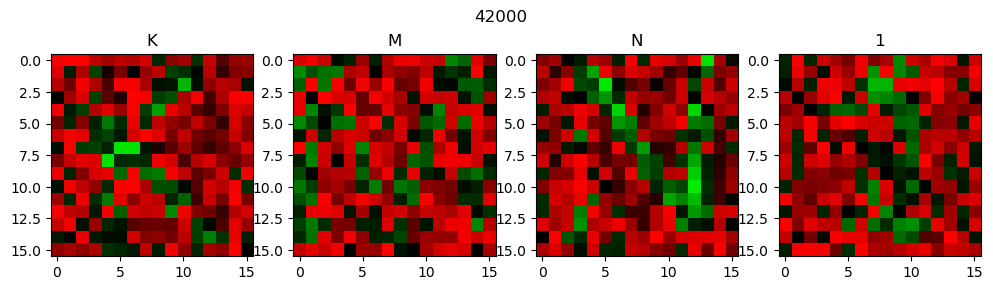

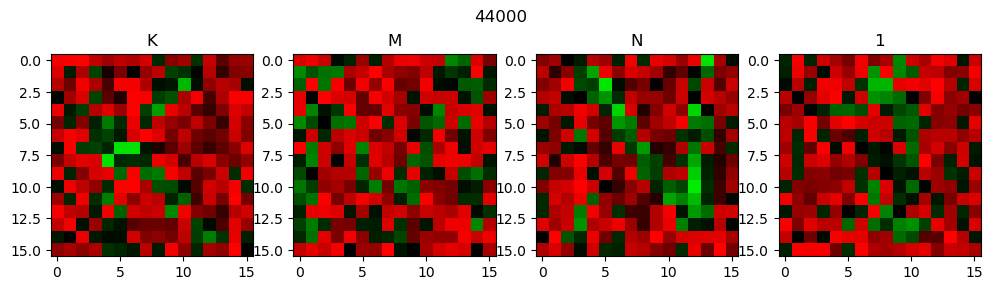

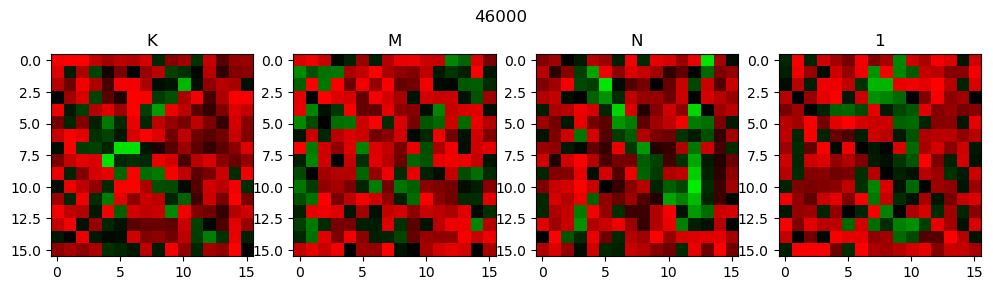

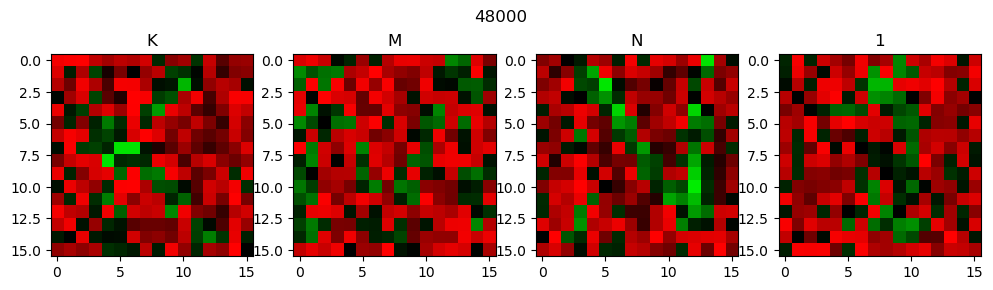

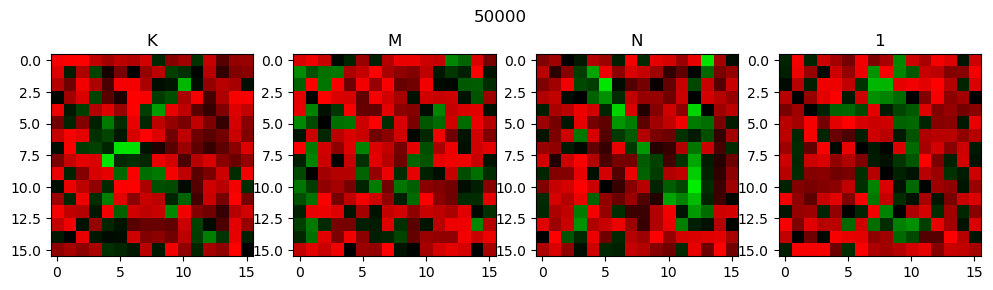

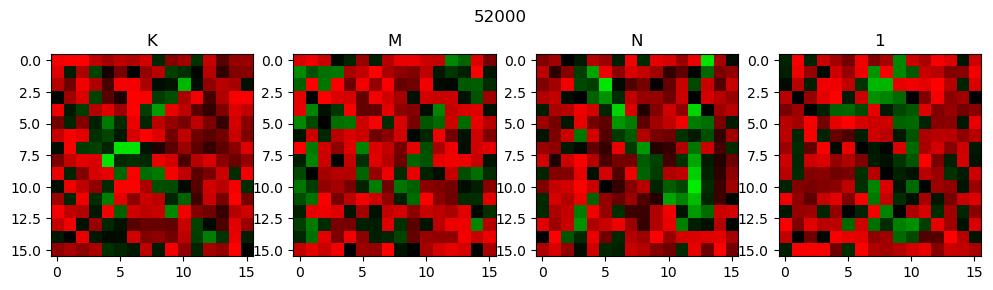

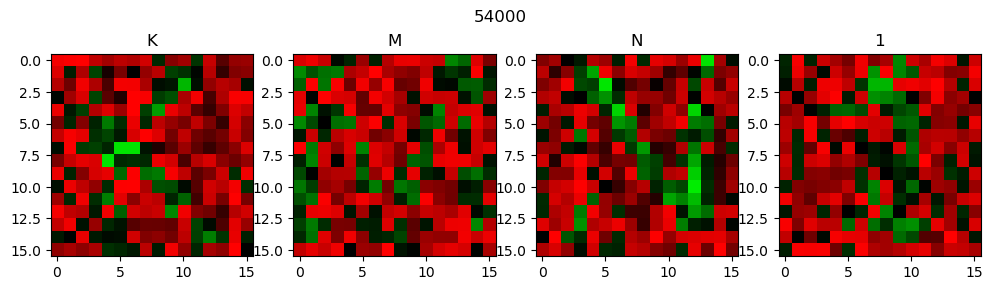

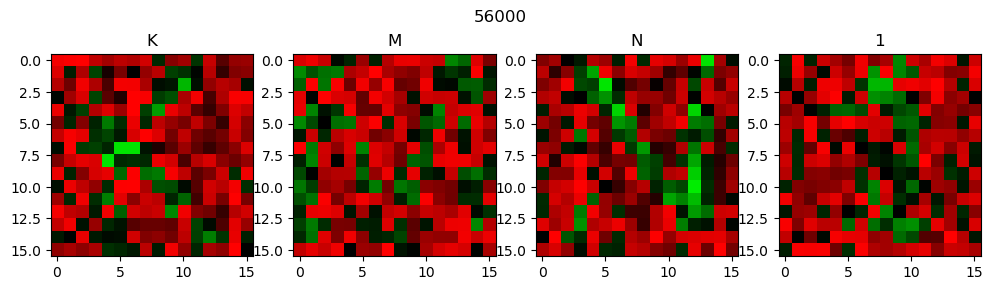

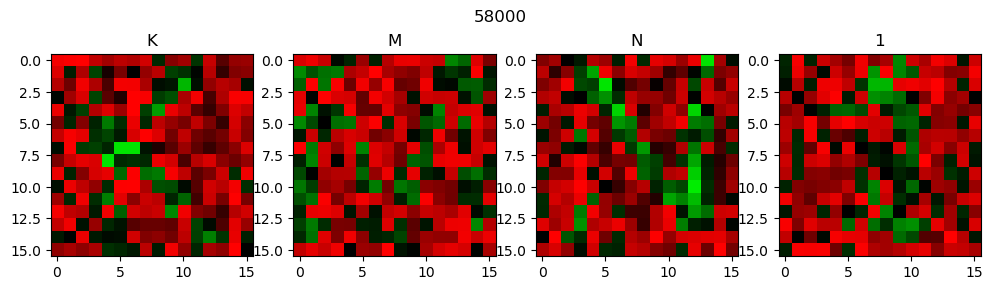

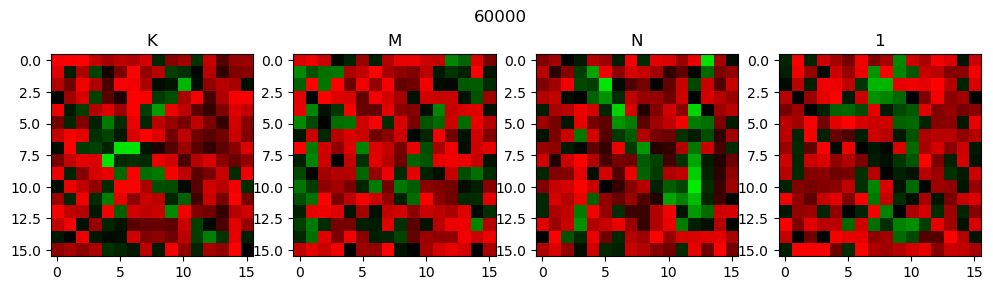

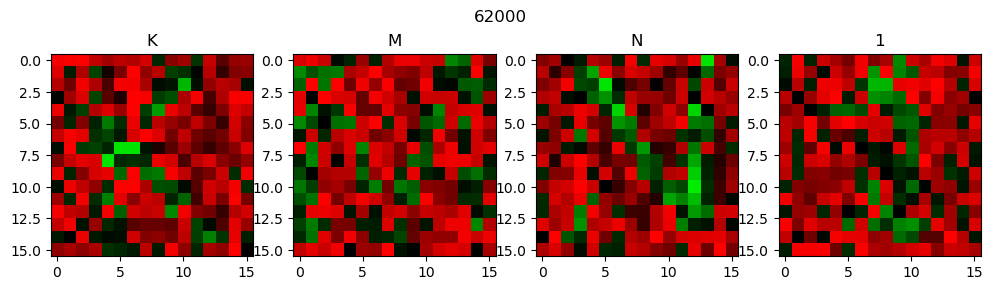

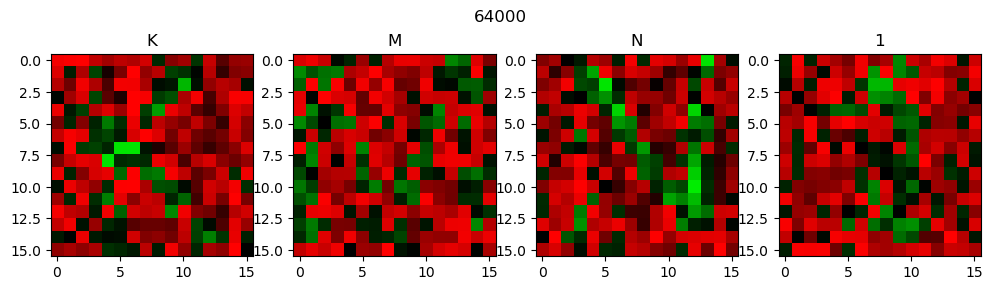

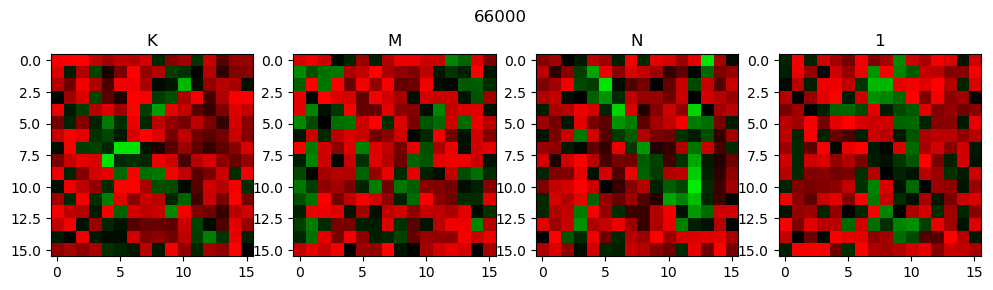

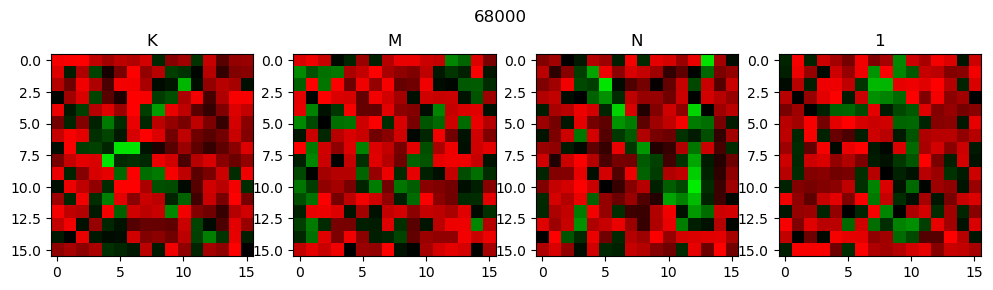

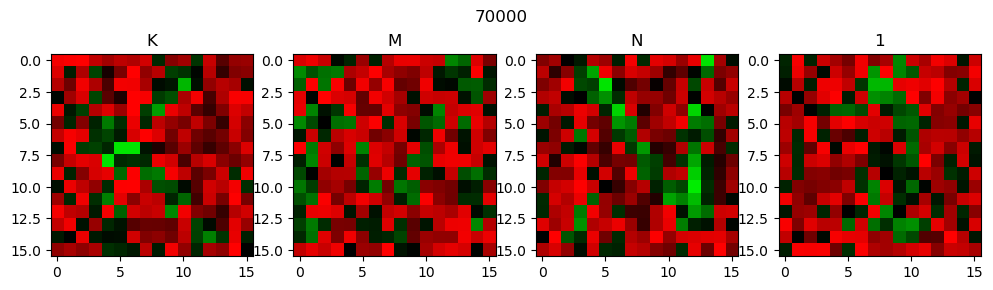

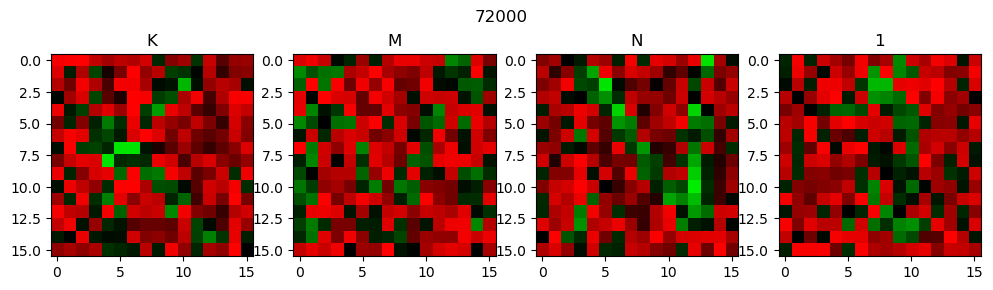

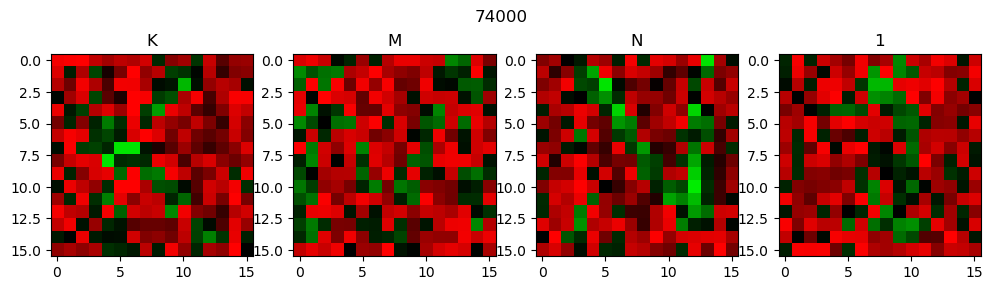

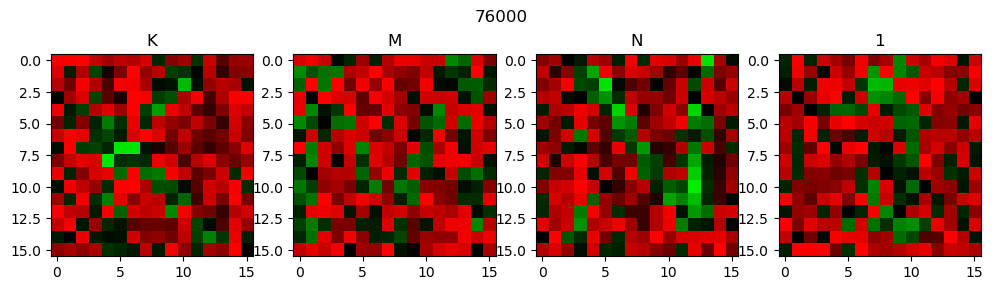

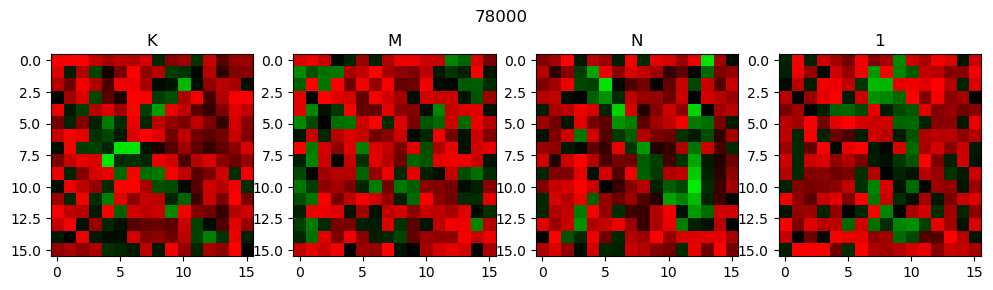

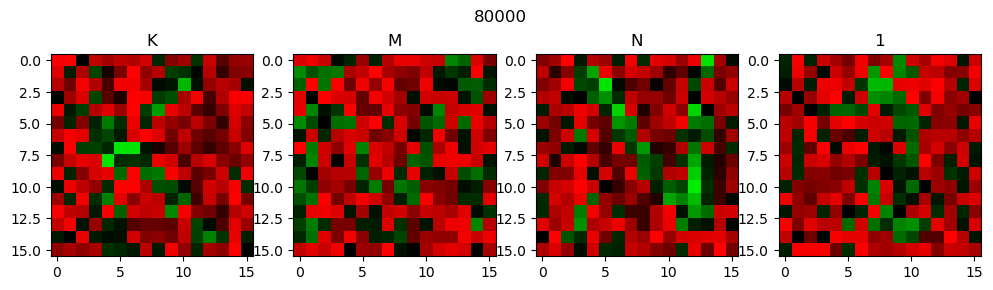

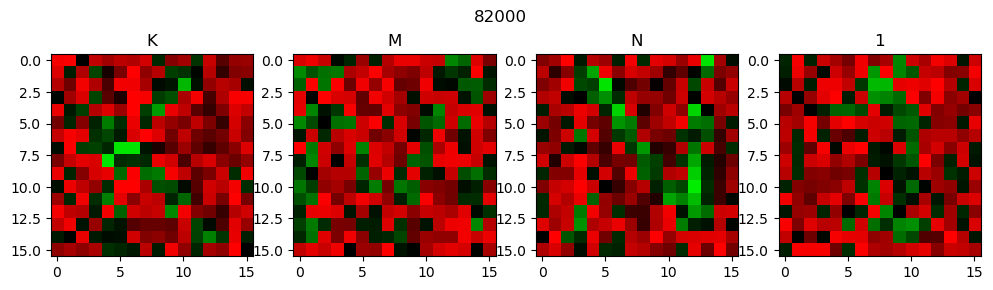

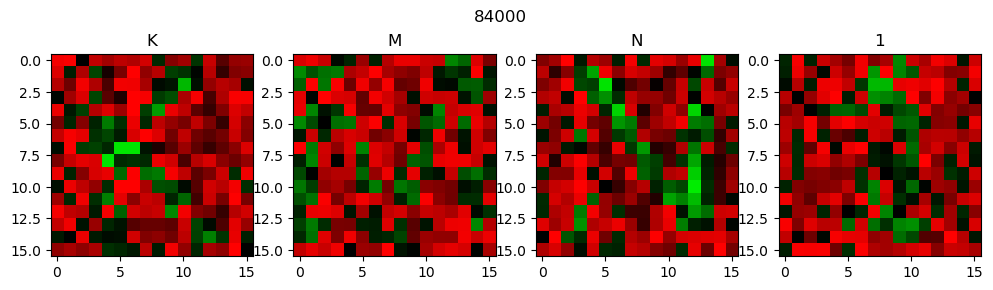

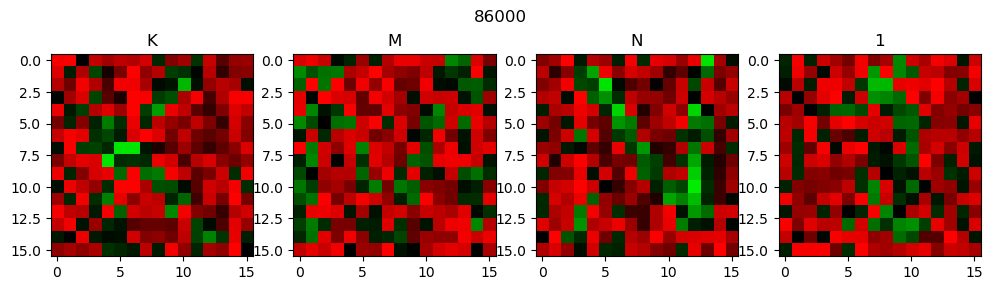

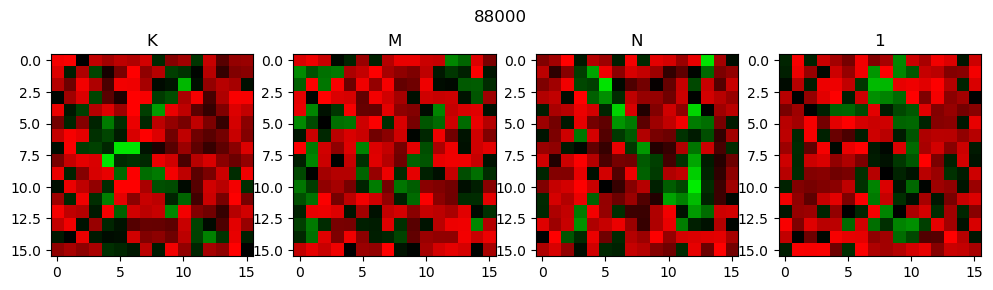

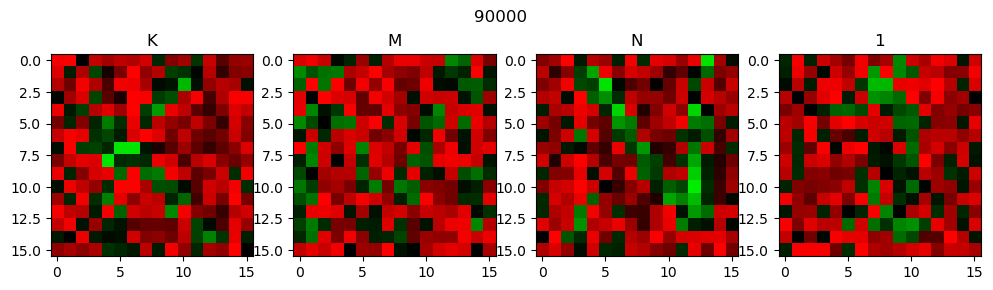

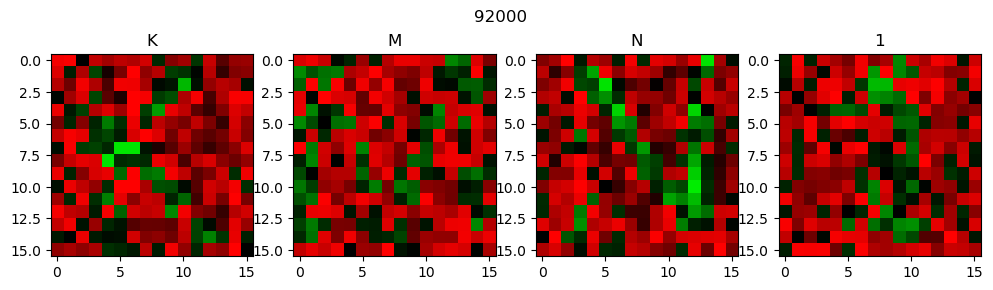

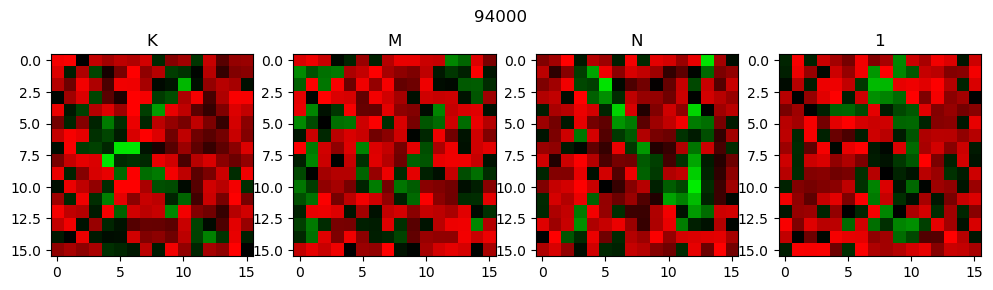

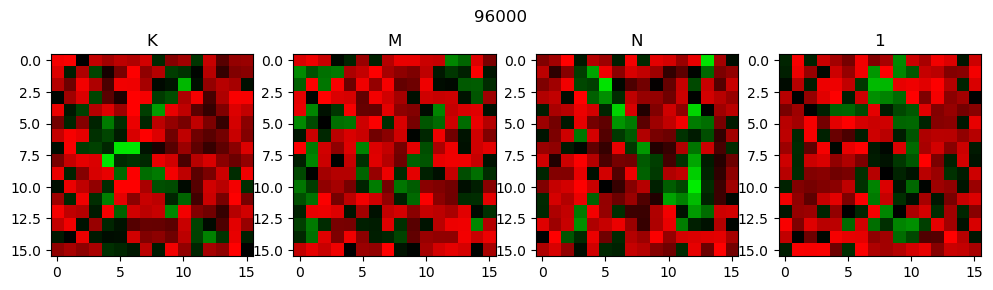

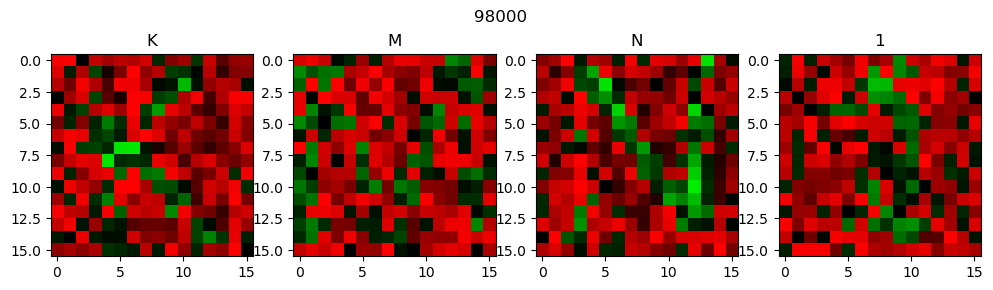

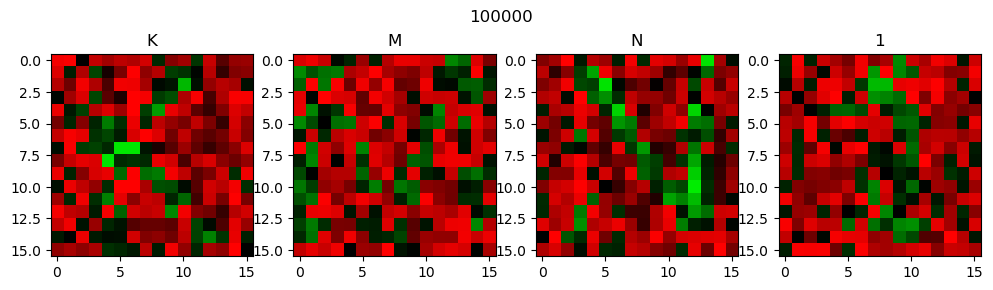

In [403]:
learnbase = np.empty((0,256))
ansbase = np.empty((0,4))
eta = 0.9
counter = 100000

for filename in os.listdir("./Images/Learn"):
    arr = np.array(Image.open('./Images/Learn/' + filename))
    arr = arr.reshape(np.size(arr))
    for i in range(len(arr)):
        arr[i] = not arr[i]
            
    ansbase = np.vstack((ansbase,[1 if filename[len(filename)-5:len(filename)-4] == 'K' else 0,
                   1 if filename[len(filename)-5:len(filename)-4] == 'M' else 0,
                   1 if filename[len(filename)-5:len(filename)-4] == 'N' else 0,
                   1 if filename[len(filename)-5:len(filename)-4] == '1' else 0]))
    learnbase = np.concatenate((learnbase,[arr]))

img_show(0)
for iteration in range(counter):
    for i in range(len(learnbase)):
        for j in range(len(ansbase[0])):
            calculated = f(neursum(learnbase[i],w[:,j],w0[j]))
            err = ansbase[i][j] - calculated
            if err != 0:
                for k in range(256):
                    w[k][j]+= eta*err*learnbase[i][k]
                w0[j] += eta*err
    if ((iteration+1)%2000 == 0):
        img_show(iteration+1)
    

In [404]:
for filename in os.listdir("./Images/Test"):
    img = Image.open('./Images/Test/' + filename)
    arr = np.array(img)
    arr = arr.reshape(np.size(arr))
    ans = []
    for i in range(len(arr)):
        arr[i] = not arr[i]
    for j in range(4):
        ans.append(f(neursum(arr,w[:,j],w0[j])))
    display(img)
    for i in range(len(ans)):
        print(ans[i]*100,'%',' - ',"KMN1"[i],sep="")    

0.0003396921187349103% - K
8.640520451004018e-07% - M
1.966907941557872e-07% - N
99.99273056815787% - 1


2.893036056635324% - K
4.485007918497694e-09% - M
0.000172992943076472% - N
8.206750349313177e-10% - 1


3.089271883810693e-13% - K
99.99999961903805% - M
7.245265187548595e-25% - N
1.933963205977562e-13% - 1


2.925953069706786e-20% - K
3.872058931929799e-06% - M
99.9999993442236% - N
3.2240376923293903e-06% - 1


In [405]:
for filename in os.listdir("./Images/Test2"):
    img = Image.open('./Images/Test2/' + filename)
    arr = np.array(img)
    arr = arr.reshape(np.size(arr))
    ans = []
    for i in range(len(arr)):
        arr[i] = not arr[i]
    for j in range(4):
        ans.append(f(neursum(arr,w[:,j],w0[j])))
    display(img)
    for i in range(len(ans)):
        print(ans[i]*100,'%',' - ',"KMN1"[i],sep="")    

99.99695449317217% - K
0.0028480381710456436% - M
1.2293716886538835e-08% - N
0.12192536321163851% - 1


0.00036921476723537455% - K
1.6353184976110859e-06% - M
3.88014475824397e-08% - N
6.219090797657108% - 1


2.7770597145328263e-06% - K
0.0007160276251451112% - M
5.810522869641978e-05% - N
8.696163286712587e-09% - 1


0.0018635074220807923% - K
0.00013786521784799323% - M
0.002278239086011867% - N
99.9799733074158% - 1


# Обучение с изменённой моделью генерации весов

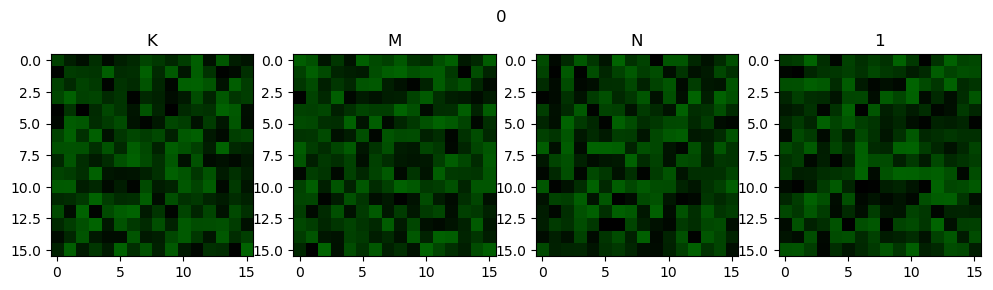

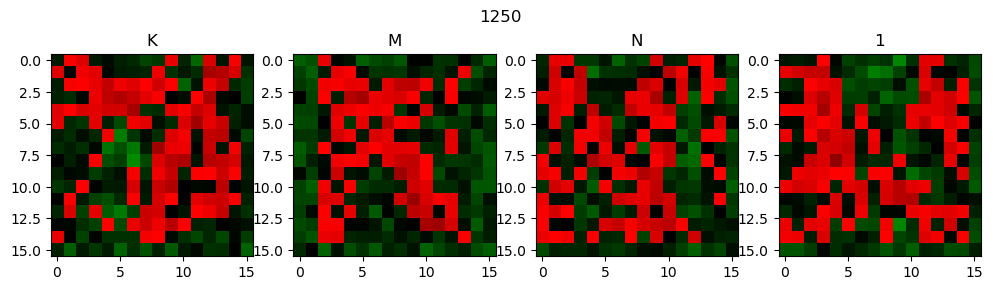

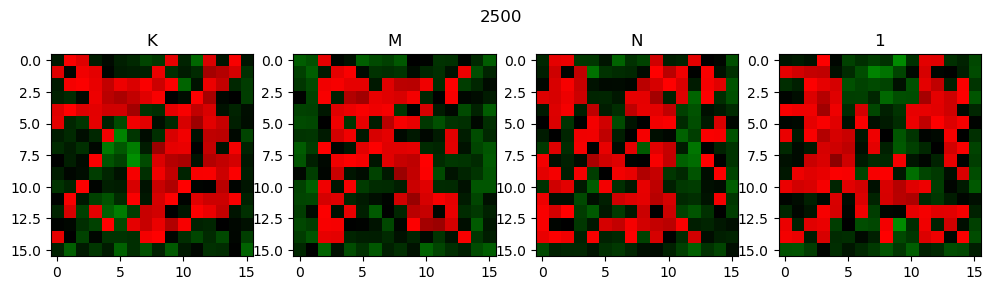

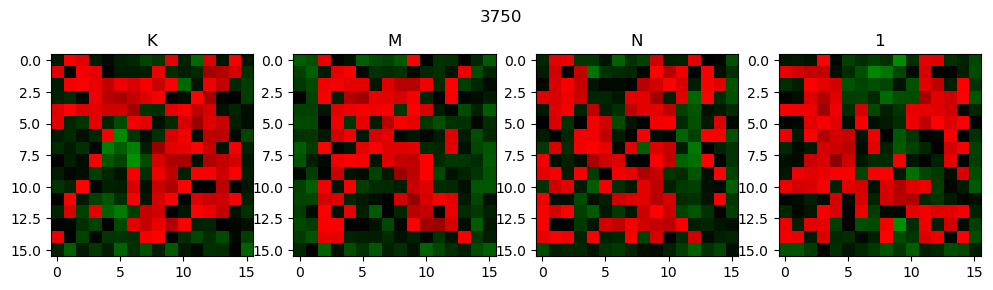

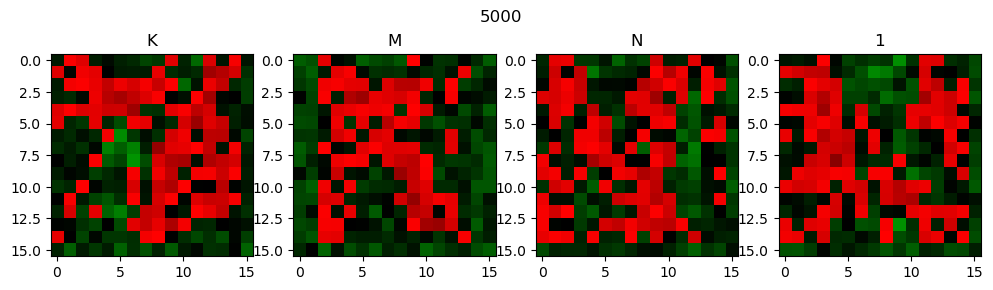

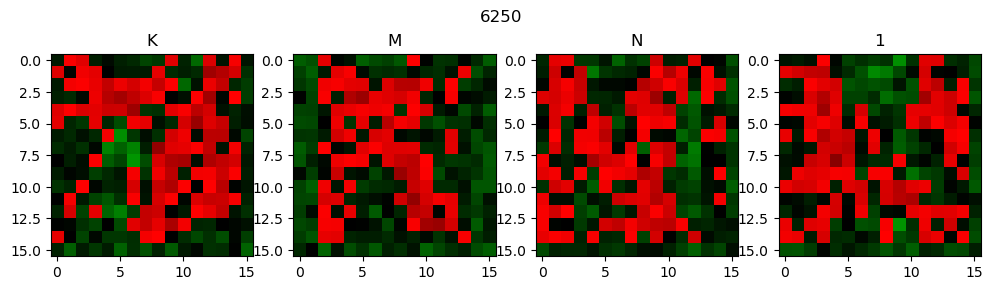

In [589]:
learnbase = np.empty((0,256))
ansbase = np.empty((0,4))
eta = 0.15
counter = 6250

for filename in os.listdir("./Images/Learn"):
    arr = np.array(Image.open('./Images/Learn/' + filename))
    arr = arr.reshape(np.size(arr))
    for i in range(len(arr)):
        arr[i] = not arr[i]
            
    ansbase = np.vstack((ansbase,[1 if filename[len(filename)-5:len(filename)-4] == 'K' else 0,
                   1 if filename[len(filename)-5:len(filename)-4] == 'M' else 0,
                   1 if filename[len(filename)-5:len(filename)-4] == 'N' else 0,
                   1 if filename[len(filename)-5:len(filename)-4] == '1' else 0]))
    learnbase = np.concatenate((learnbase,[arr]))

img_show(0)
for iteration in range(counter):
    for i in range(len(learnbase)):
        for j in range(len(ansbase[0])):
            calculated = f(neursum(learnbase[i],w[:,j],w0[j]))
            err = ansbase[i][j] - calculated
            if err != 0:
                for k in range(256):
                    w[k][j]+= eta*err*learnbase[i][k]
                w0[j] += eta*err
    if ((iteration+1)%1250 == 0):
        img_show(iteration+1)

In [590]:
for filename in os.listdir("./Images/Test"):
    img = Image.open('./Images/Test/' + filename)
    arr = np.array(img)
    arr = arr.reshape(np.size(arr))
    ans = []
    for i in range(len(arr)):
        arr[i] = not arr[i]
    for j in range(4):
        ans.append(f(neursum(arr,w[:,j],w0[j])))
    display(img)
    for i in range(len(ans)):
        print(ans[i]*100,'%',' - ',"KMN1"[i],sep="")    

0.16162717171589122% - K
0.2988711825364392% - M
0.04168102109137719% - N
99.98548825211395% - 1


99.90192768457763% - K
0.033551462920095775% - M
6.0204322691336385% - N
7.314058578862824e-05% - 1


0.06394832362660358% - K
99.99999991761301% - M
0.0026714299400564657% - N
3.676047789609915e-05% - 1


8.551711617056029e-05% - K
0.20884700634148093% - M
98.03546796257969% - N
0.003070437675408856% - 1


In [591]:
for filename in os.listdir("./Images/Test2"):
    img = Image.open('./Images/Test2/' + filename)
    arr = np.array(img)
    arr = arr.reshape(np.size(arr))
    ans = []
    for i in range(len(arr)):
        arr[i] = not arr[i]
    for j in range(4):
        ans.append(f(neursum(arr,w[:,j],w0[j])))
    display(img)
    for i in range(len(ans)):
        print(ans[i]*100,'%',' - ',"KMN1"[i],sep="")    

94.13494929123475% - K
0.072204635076182% - M
0.0032277161548611593% - N
0.008982488478381371% - 1


6.445951861989617% - K
3.1567521023431735% - M
9.768608442524048% - N
4.4245770299059535% - 1


92.381941663653% - K
99.64814578112309% - M
55.74042582565123% - N
0.018424802731089377% - 1


0.009120449474981359% - K
0.17119709317816048% - M
0.4851891420103716% - N
97.69868704771838% - 1


In [567]:
np.savetxt("w.txt",w)
np.savetxt("w0.txt",w0)